In [13]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm.auto import tqdm

# Japanese font installation
# 1) `$ mkdir $HOME/.fonts`
# 2) Download Osaka.ttf tp $HOME/.fonts/
# 3) `$ fc-cache`
# 4) (optional) Clear matplotlib cache dir, find the dir with `matplotlib.get_cachedir()`
# plt.rcParams['font.family'] = 'Osaka'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

np.set_printoptions(suppress=True)

sns.set_style("ticks")

plt.rcParams['figure.figsize'] = (8.0, 5.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
one_ugg = pd.read_json("../data/ONE-UGG-RA.json")
tmbgqg = pd.read_json("../data/TMBGQG.json")

In [5]:
one_ugg
tmbgqg

mstar_id    nav_date  value      amount        name morningstar_id
0     F00000WS3W  2016-02-04  9.974    33170905  ONE-UGG-RA     F00000WS3W
1     F00000WS3W  2016-02-05  9.962    33130113  ONE-UGG-RA     F00000WS3W
2     F00000WS3W  2016-02-08  9.358    31121971  ONE-UGG-RA     F00000WS3W
3     F00000WS3W  2016-02-09  9.170    30496707  ONE-UGG-RA     F00000WS3W
4     F00000WS3W  2016-02-10  9.150    30429799  ONE-UGG-RA     F00000WS3W
...          ...         ...    ...         ...         ...            ...
1017  F00000WS3W  2020-04-23 21.619  1302560922  ONE-UGG-RA     F00000WS3W
1018  F00000WS3W  2020-04-24 21.605  1260664062  ONE-UGG-RA     F00000WS3W
1019  F00000WS3W  2020-04-27 21.729  1274183126  ONE-UGG-RA     F00000WS3W
1020  F00000WS3W  2020-04-28 22.009  1264884921  ONE-UGG-RA     F00000WS3W
1021  F00000WS3W  2020-04-29 21.643  1239630371  ONE-UGG-RA     F00000WS3W

[1022 rows x 6 columns]

mstar_id    nav_date  value       amount    name morningstar_id
0     F00000VICD  2015-03-23 10.000   1347186172  TMBGQG     F00000VICD
1     F00000VICD  2015-03-24  9.936   1338567500  TMBGQG     F00000VICD
2     F00000VICD  2015-03-25  9.786   1318323082  TMBGQG     F00000VICD
3     F00000VICD  2015-03-26  9.725   1310093576  TMBGQG     F00000VICD
4     F00000VICD  2015-03-27  9.752   1381141722  TMBGQG     F00000VICD
...          ...         ...    ...          ...     ...            ...
1217  F00000VICD  2020-04-23 14.234  10295806812  TMBGQG     F00000VICD
1218  F00000VICD  2020-04-24 14.398  10445987123  TMBGQG     F00000VICD
1219  F00000VICD  2020-04-27 14.587  10591269730  TMBGQG     F00000VICD
1220  F00000VICD  2020-04-28 14.449  10494828684  TMBGQG     F00000VICD
1221  F00000VICD  2020-04-29 14.773  10668297912  TMBGQG     F00000VICD

[1222 rows x 6 columns]

# ONE-UGG vs TMBGQG
- Since 2017-04, two funds are highly correlated, but TMBGQG is more stable.

/Users/phiradet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


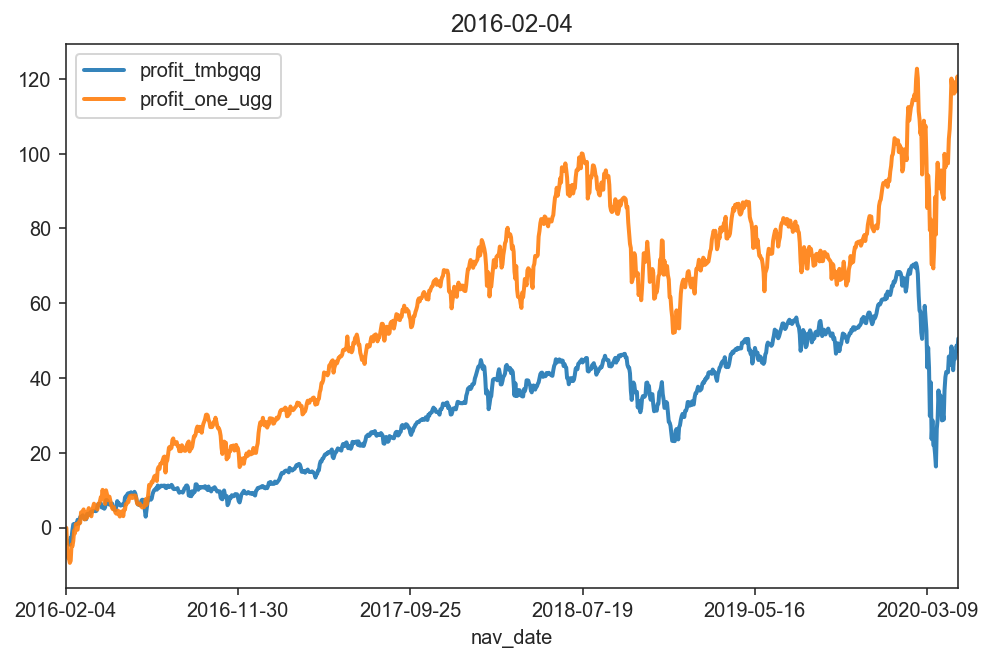

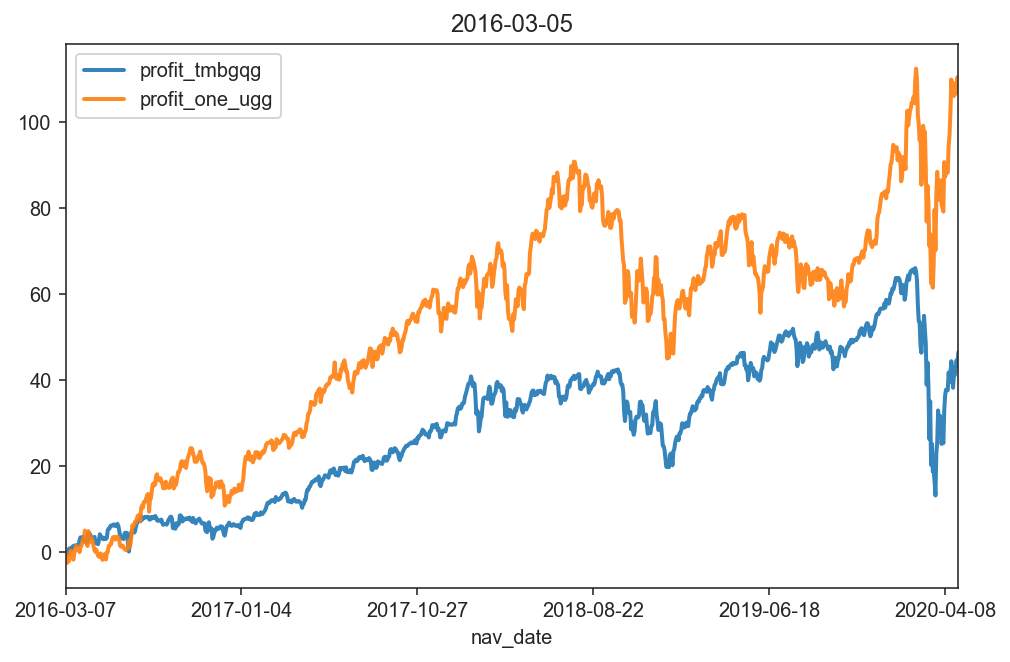

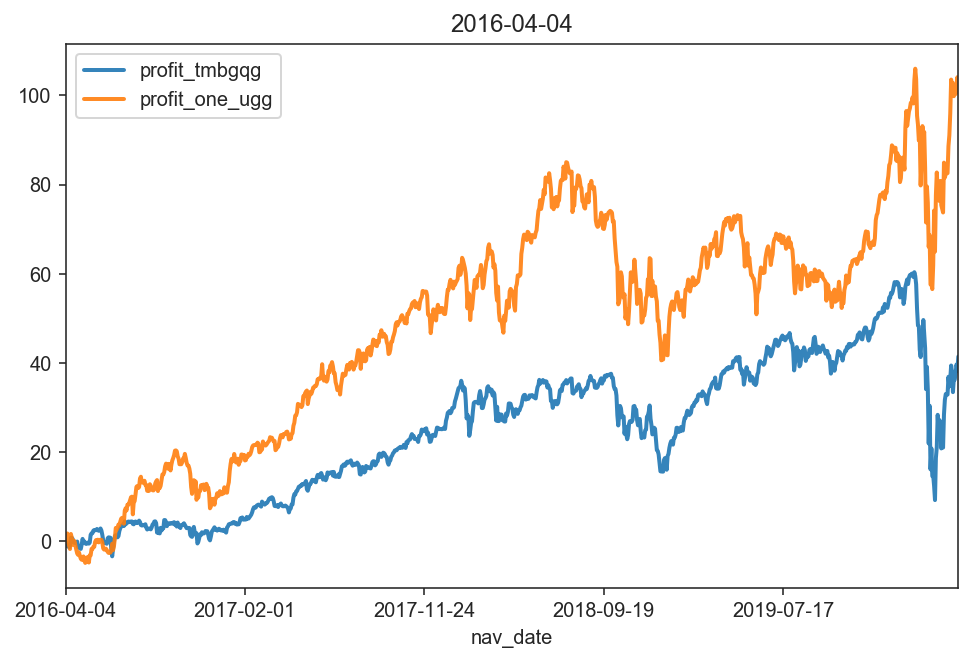

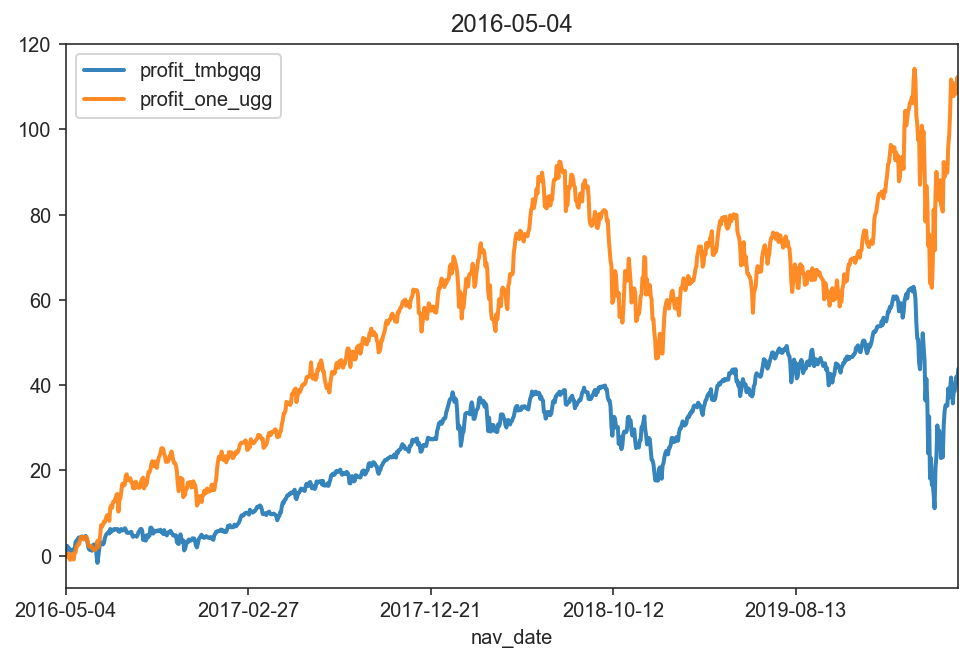

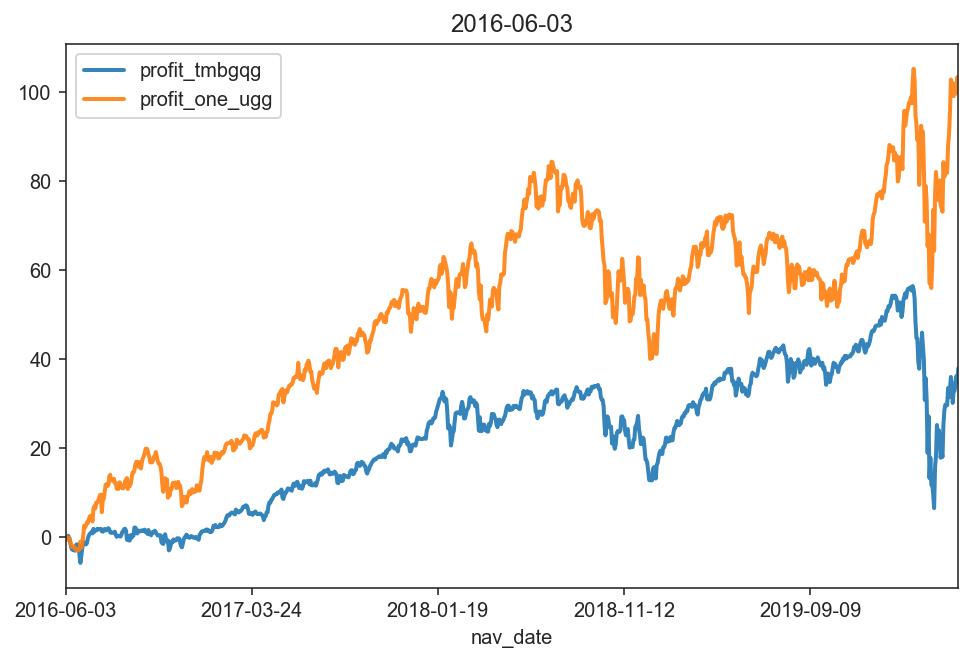

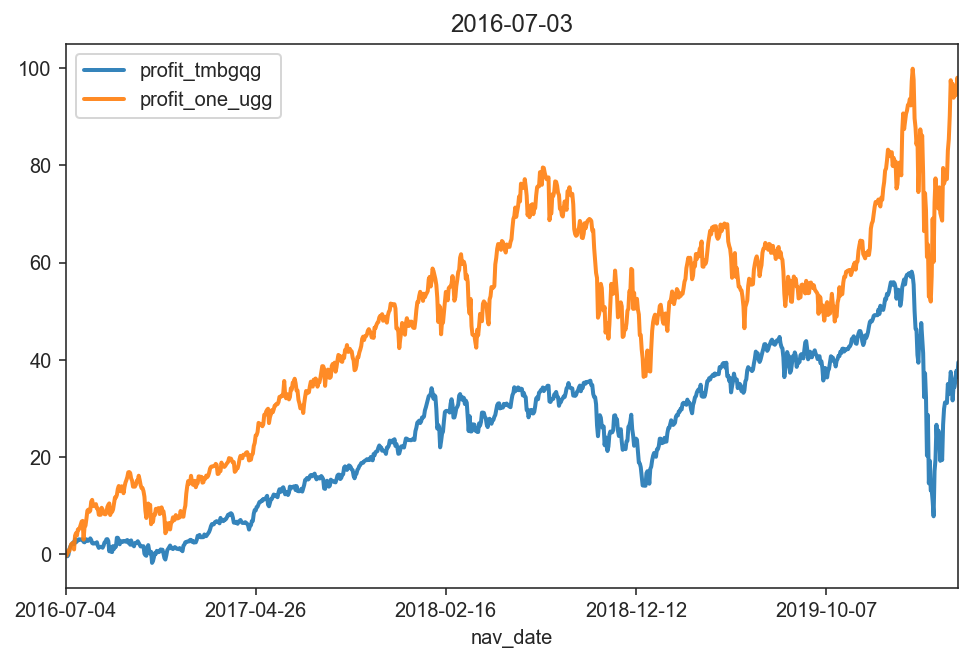

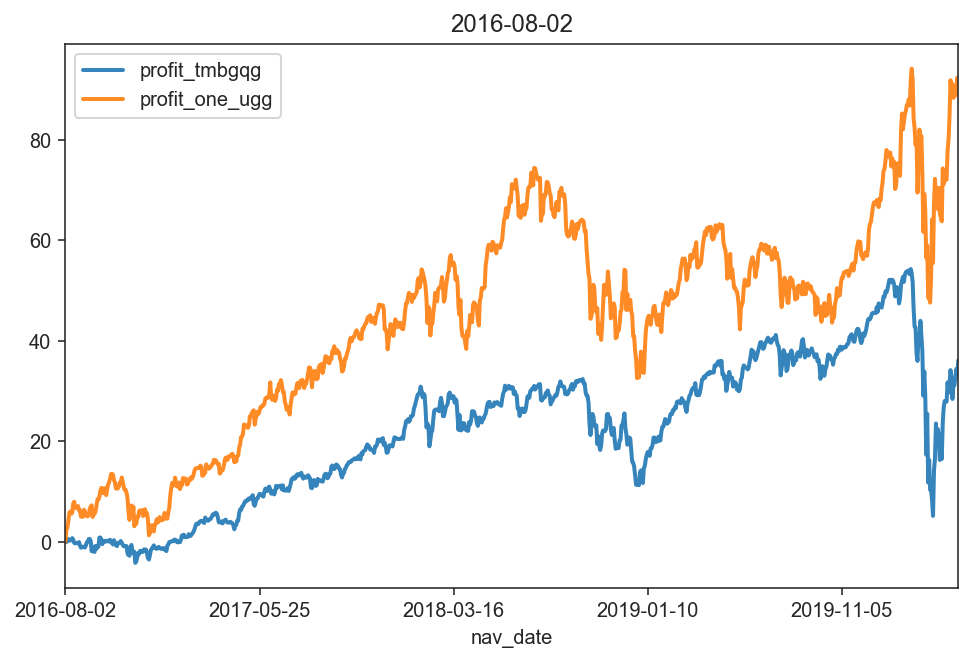

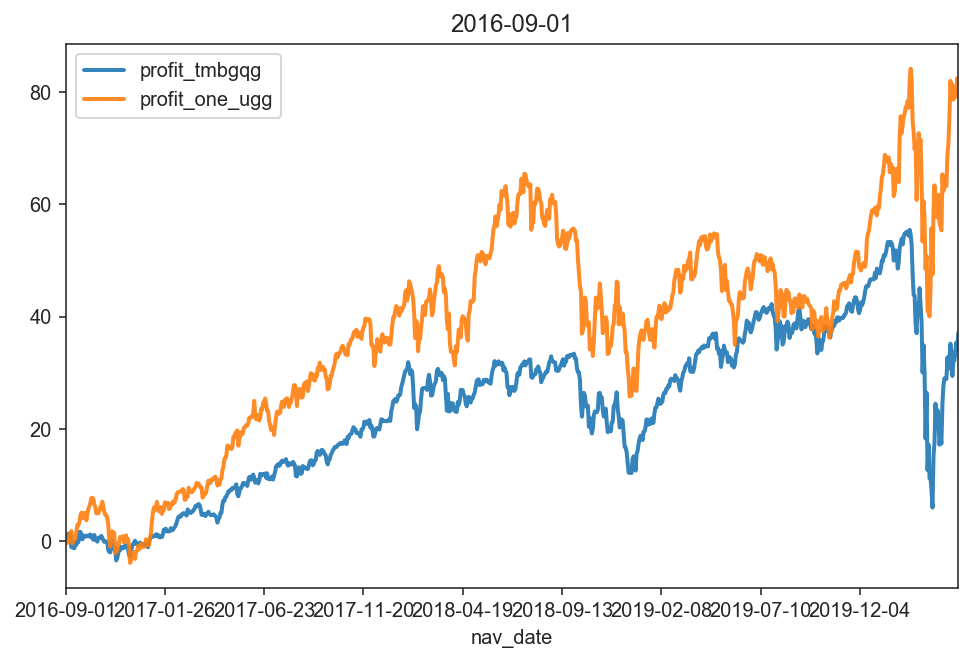

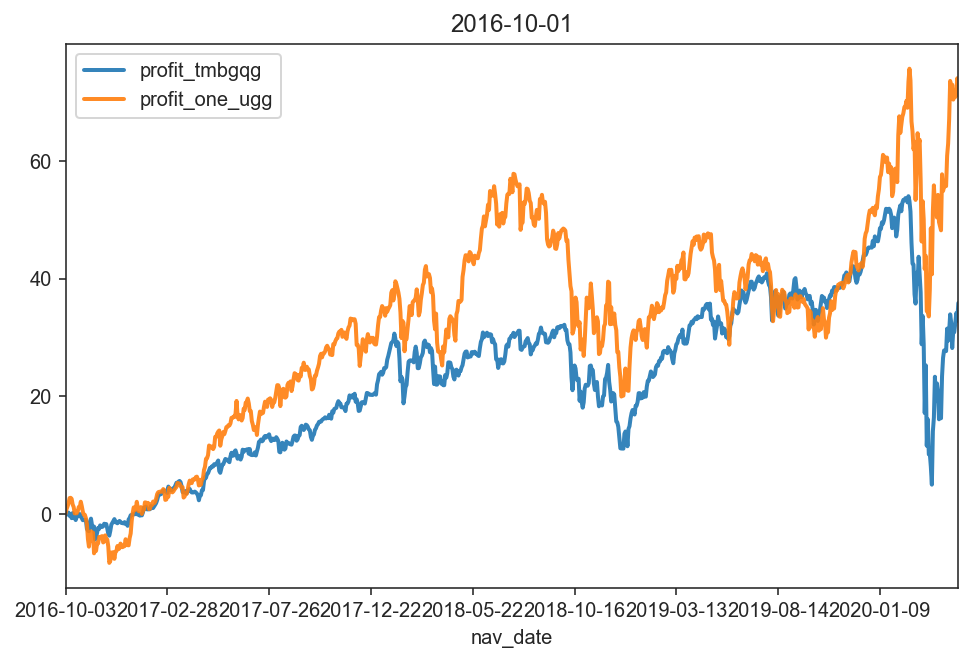

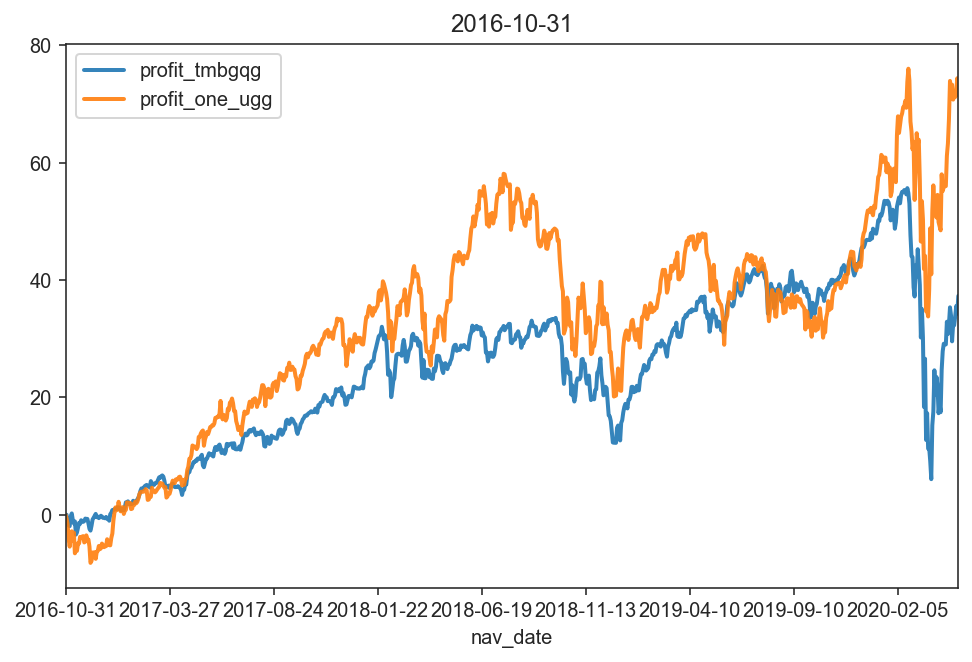

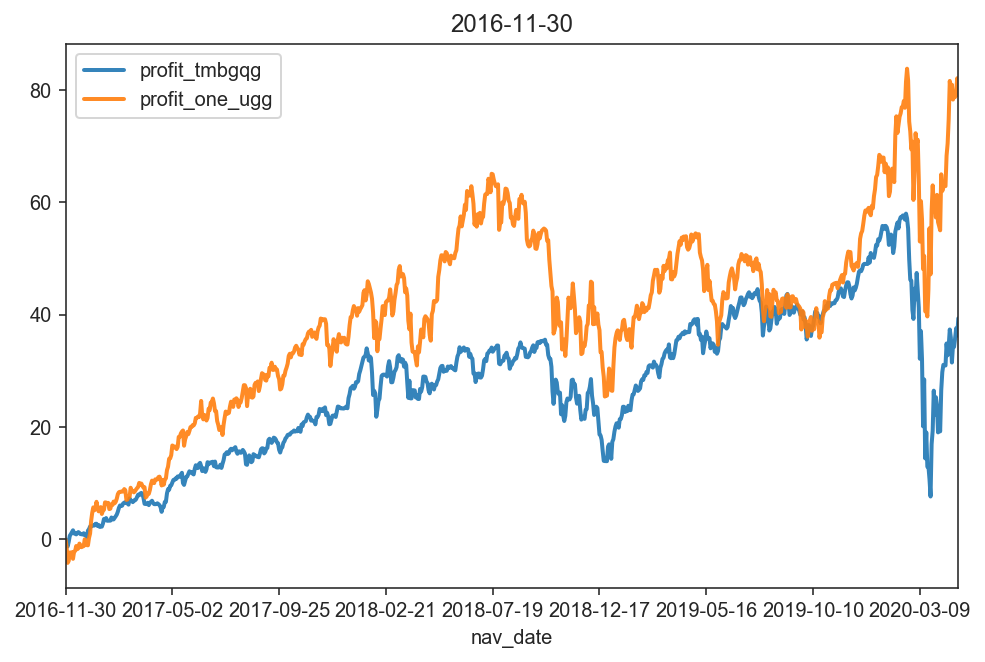

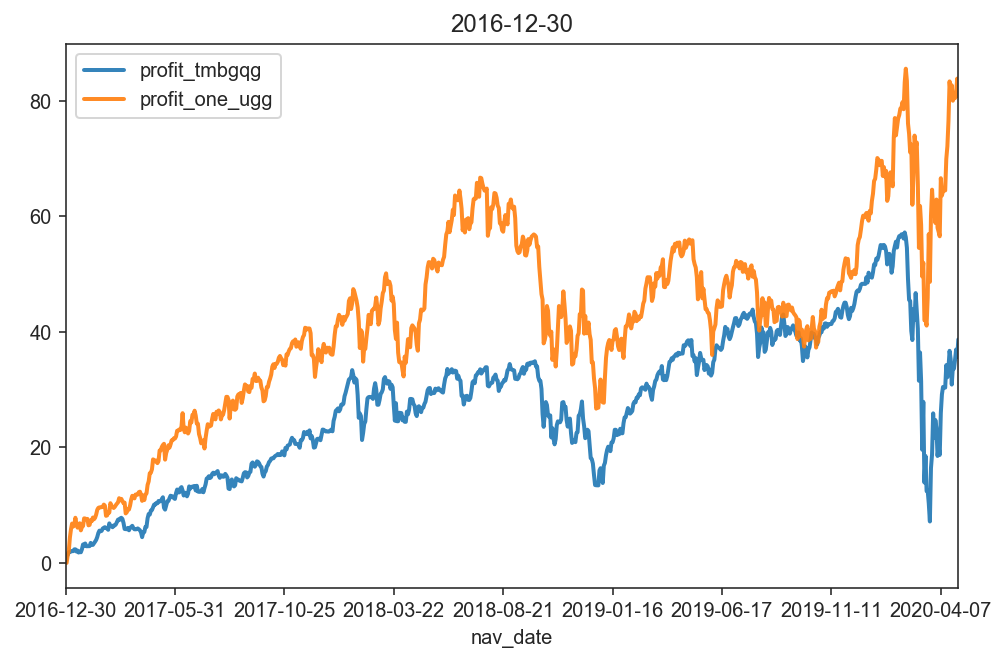

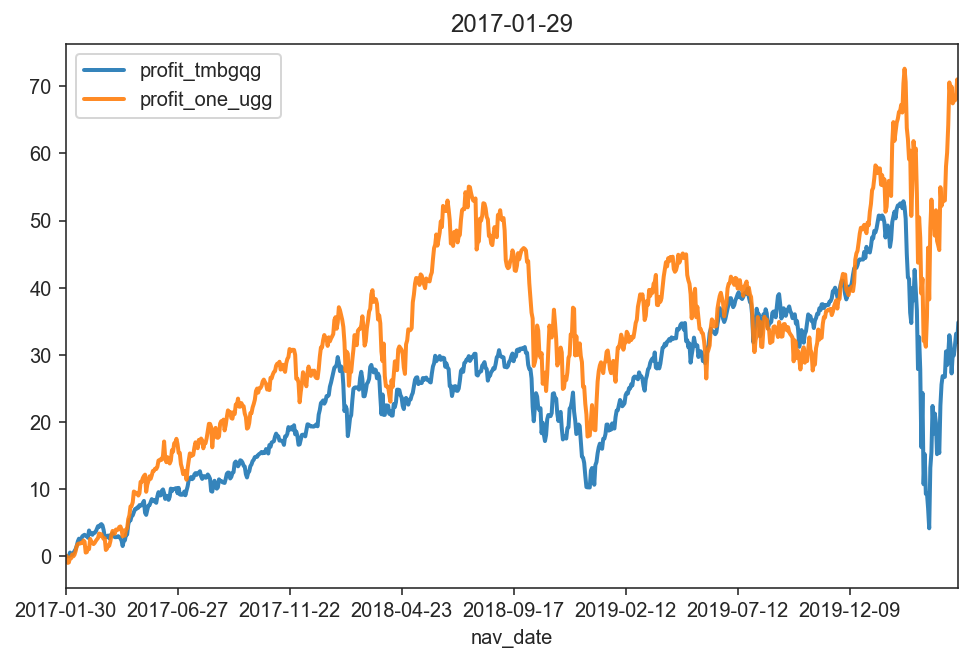

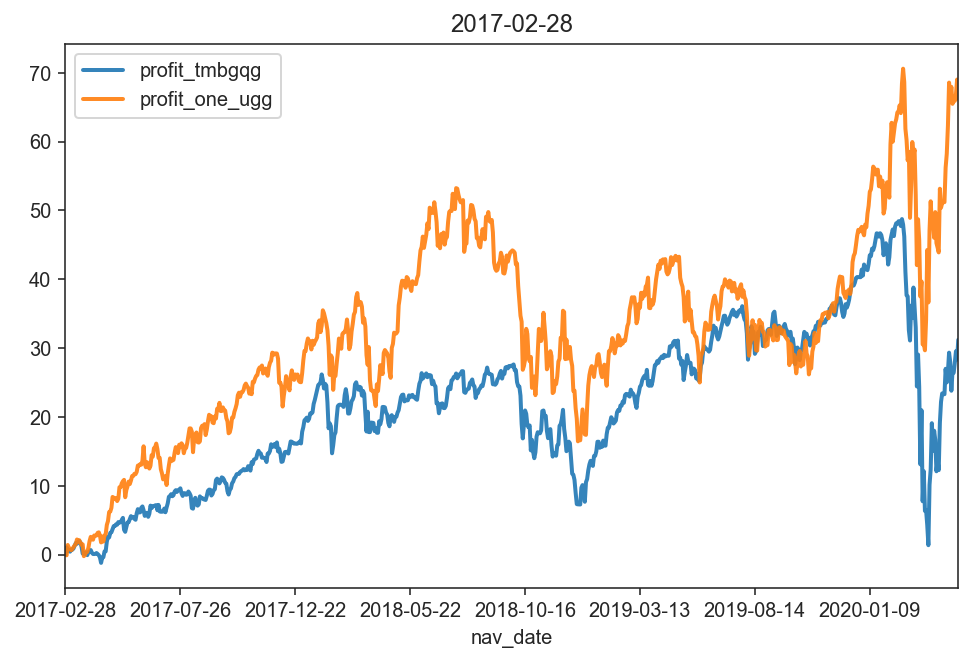

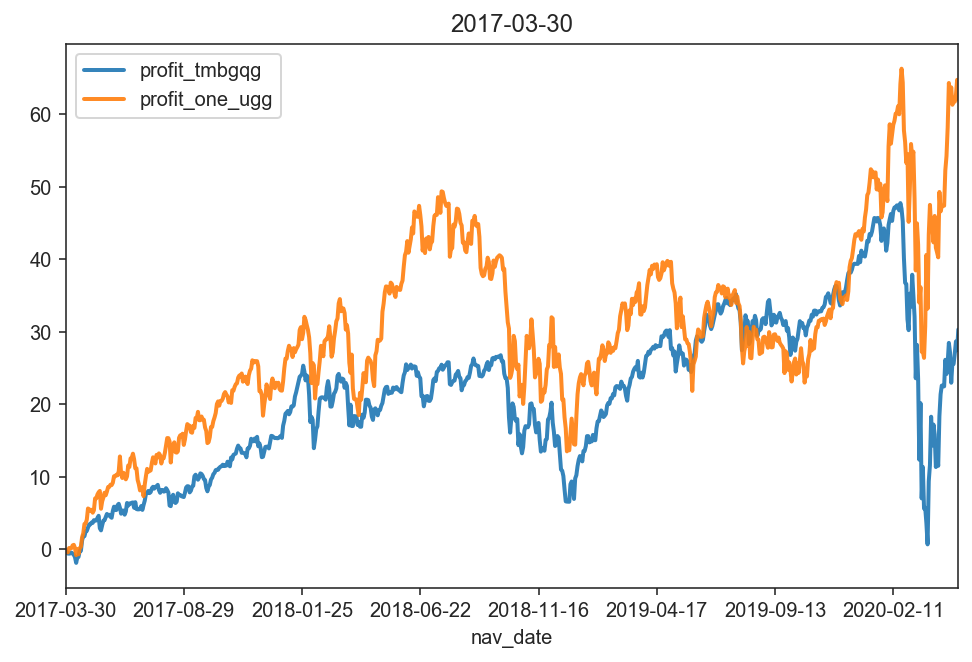

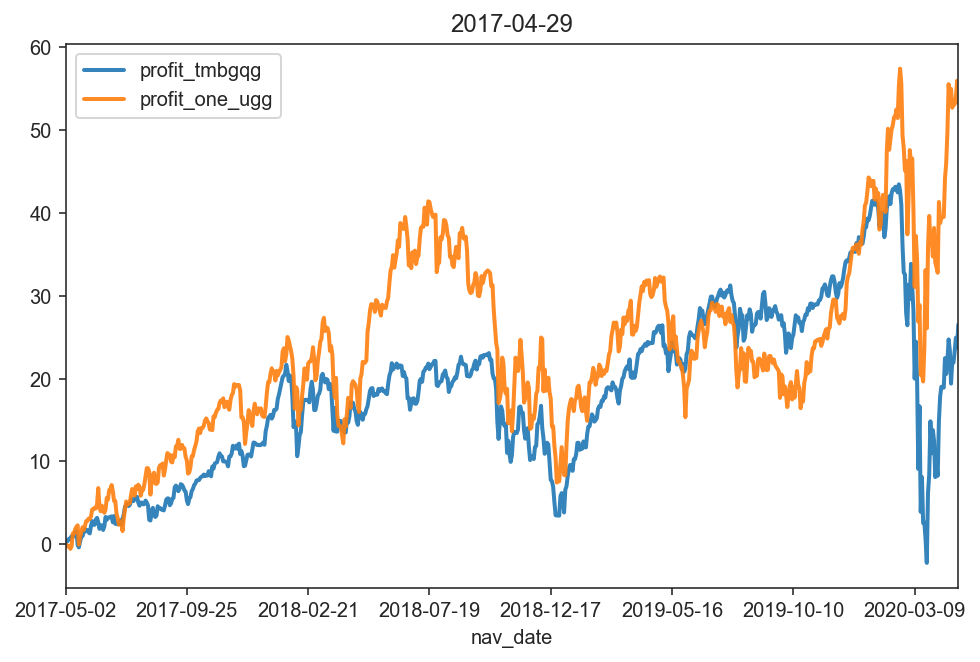

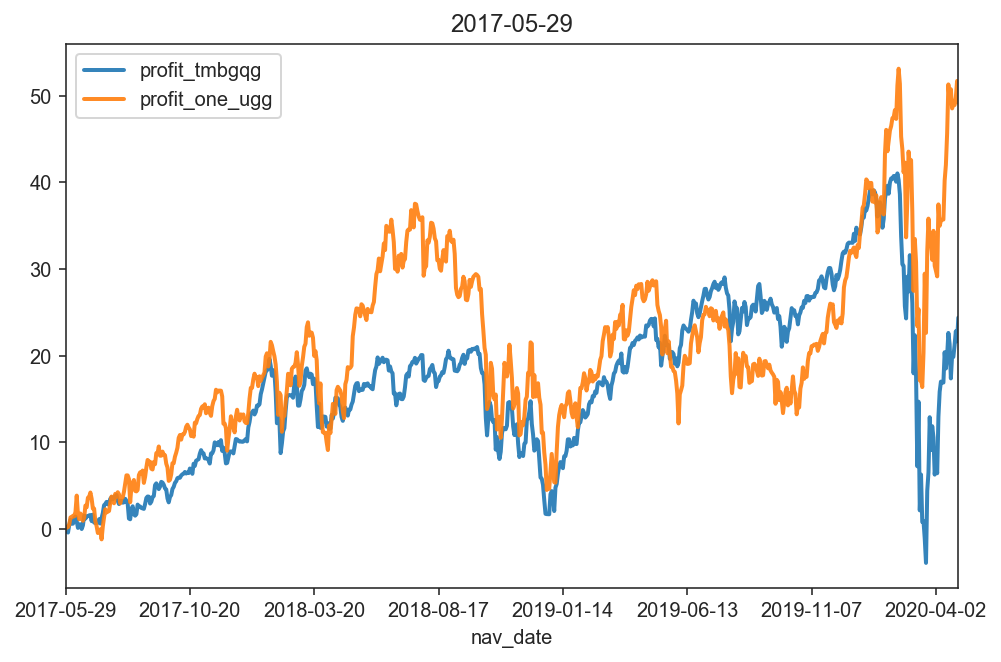

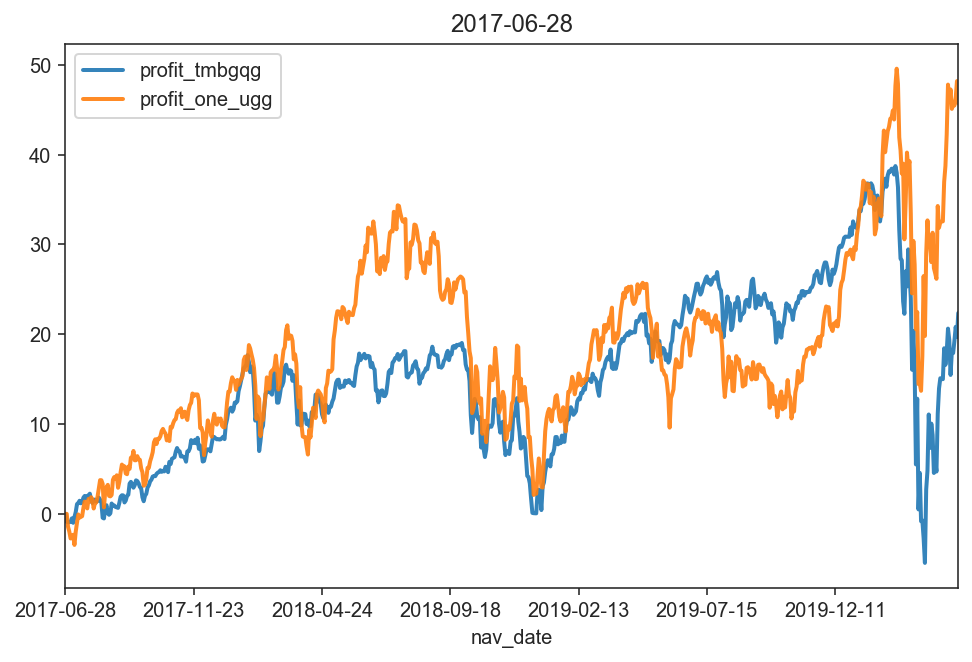

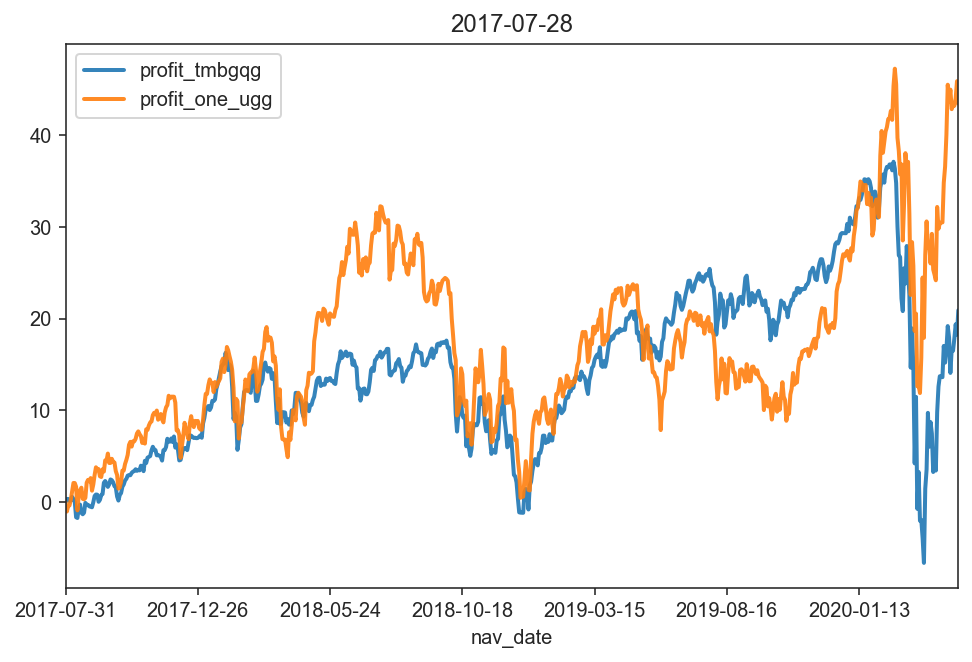

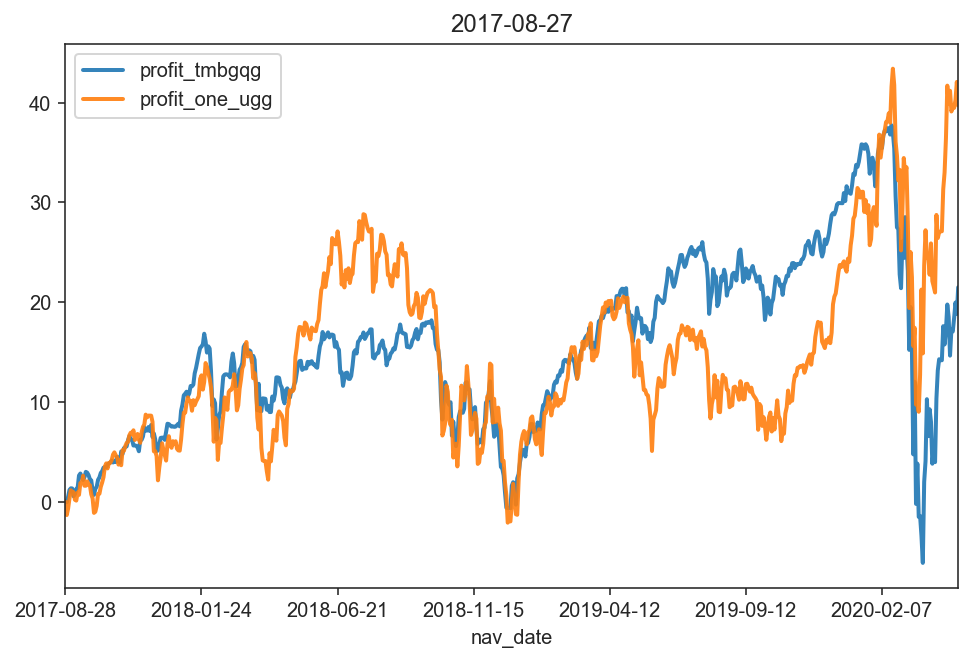

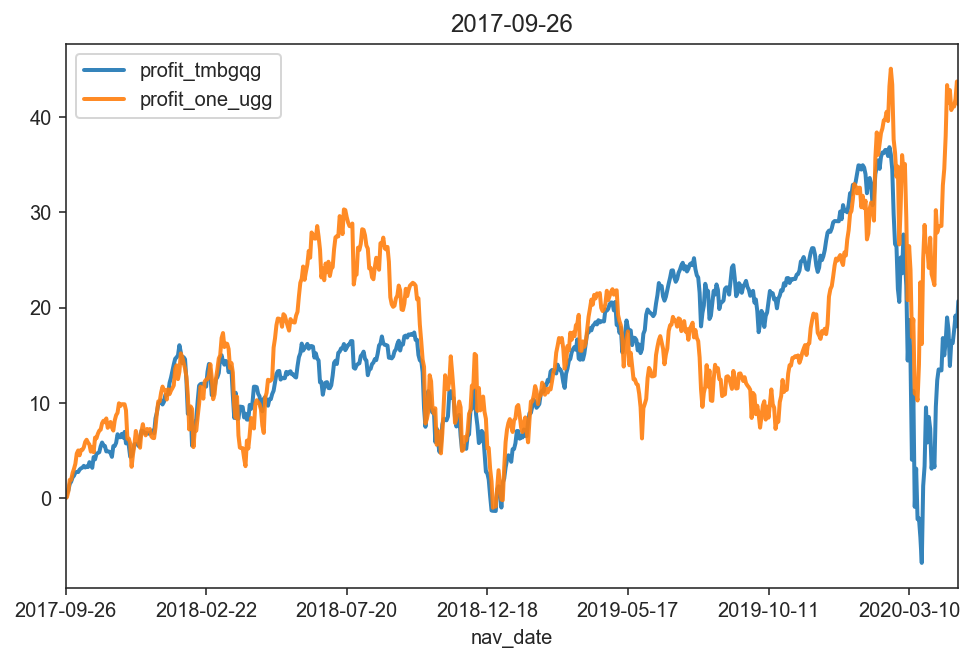

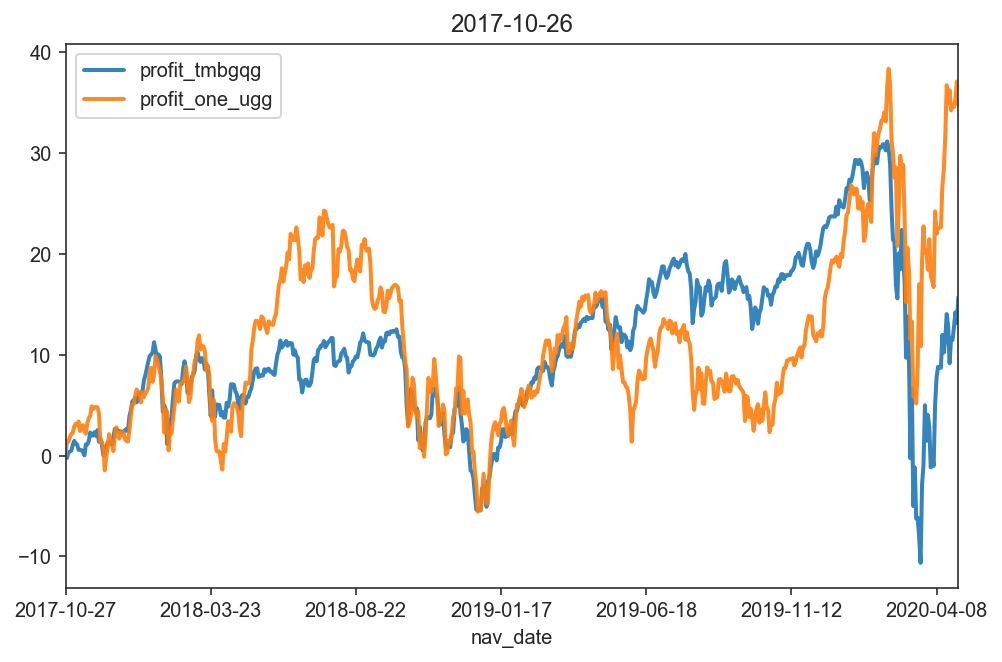

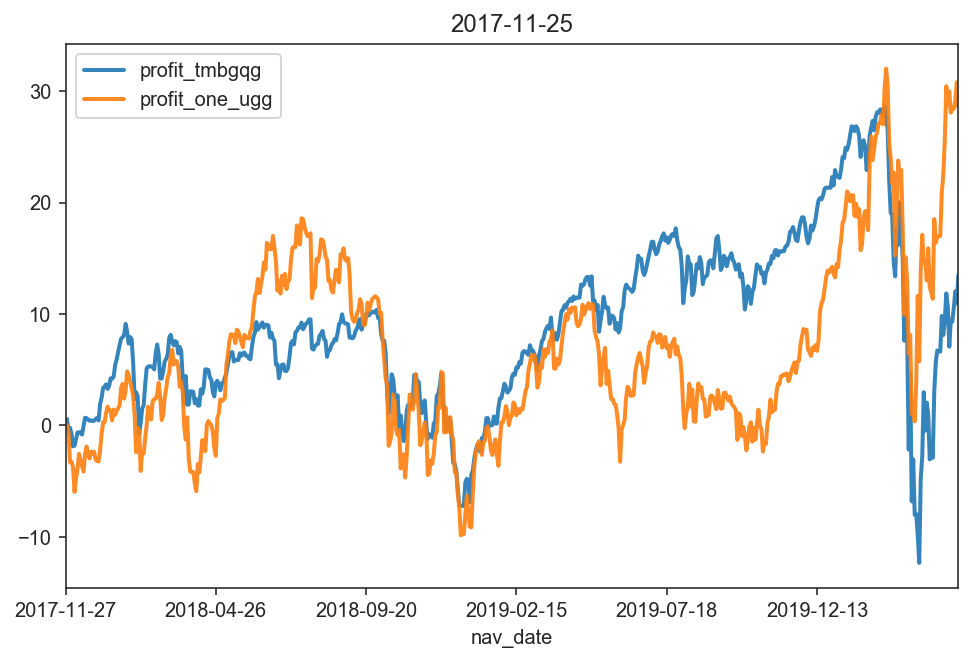

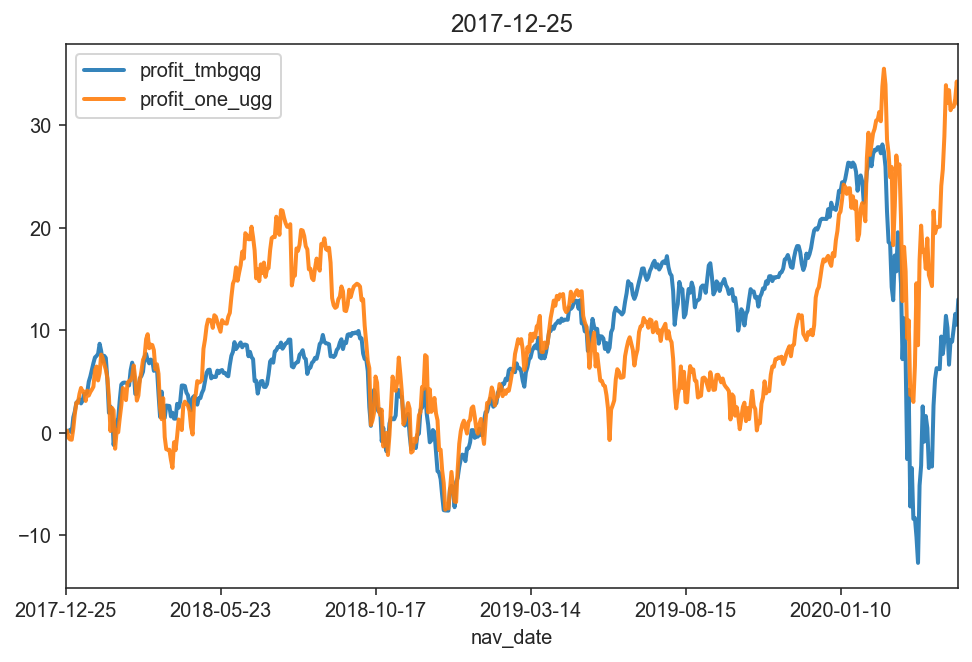

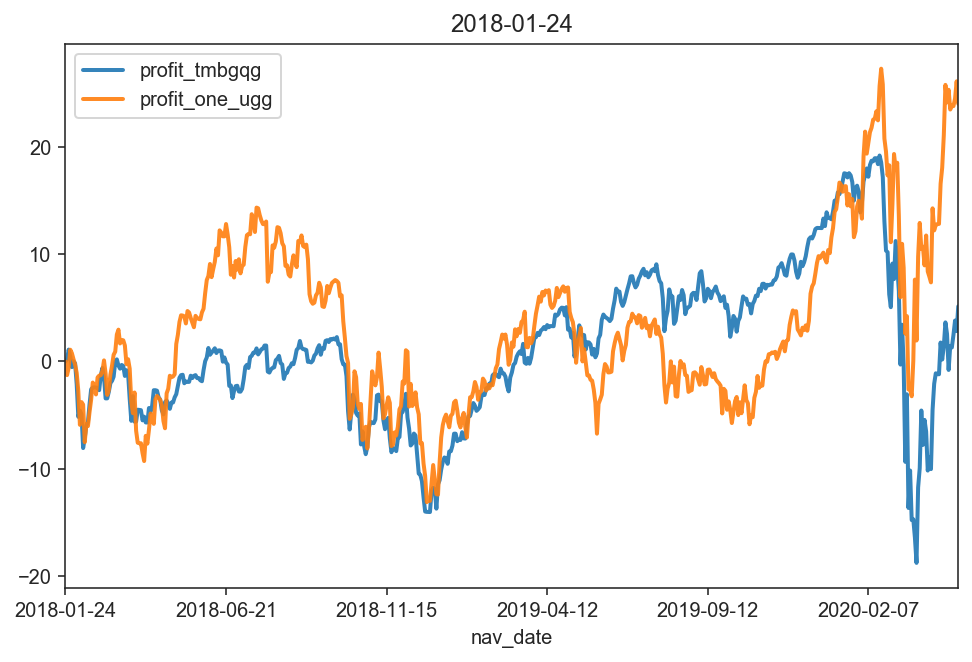

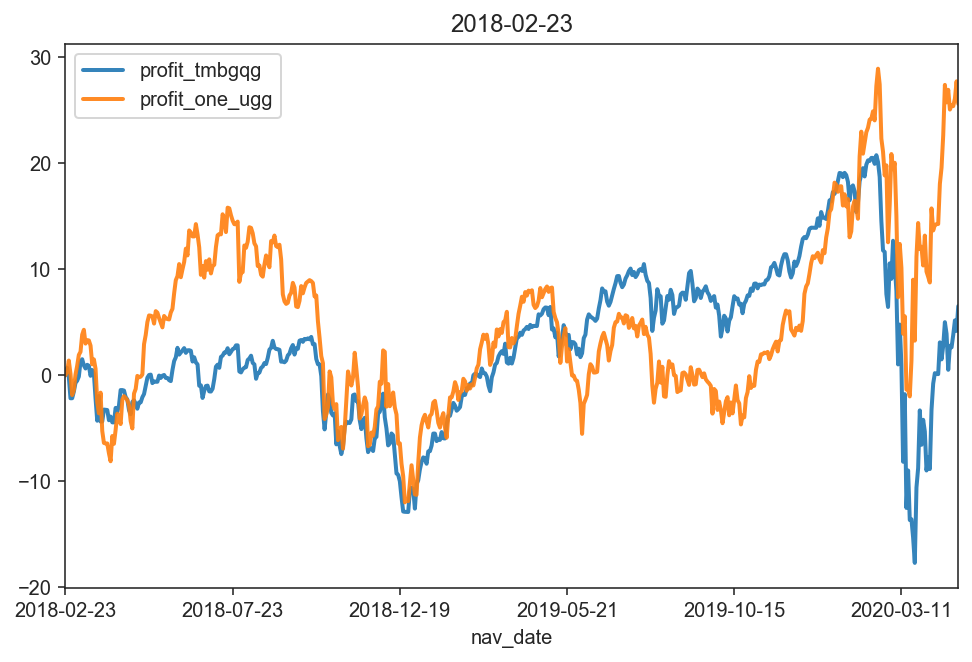

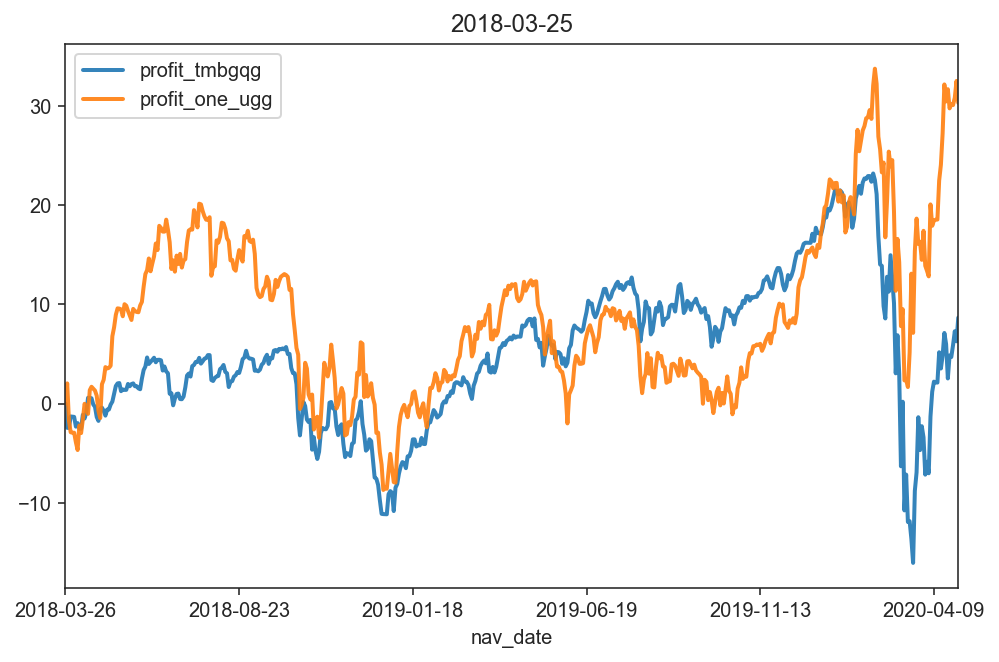

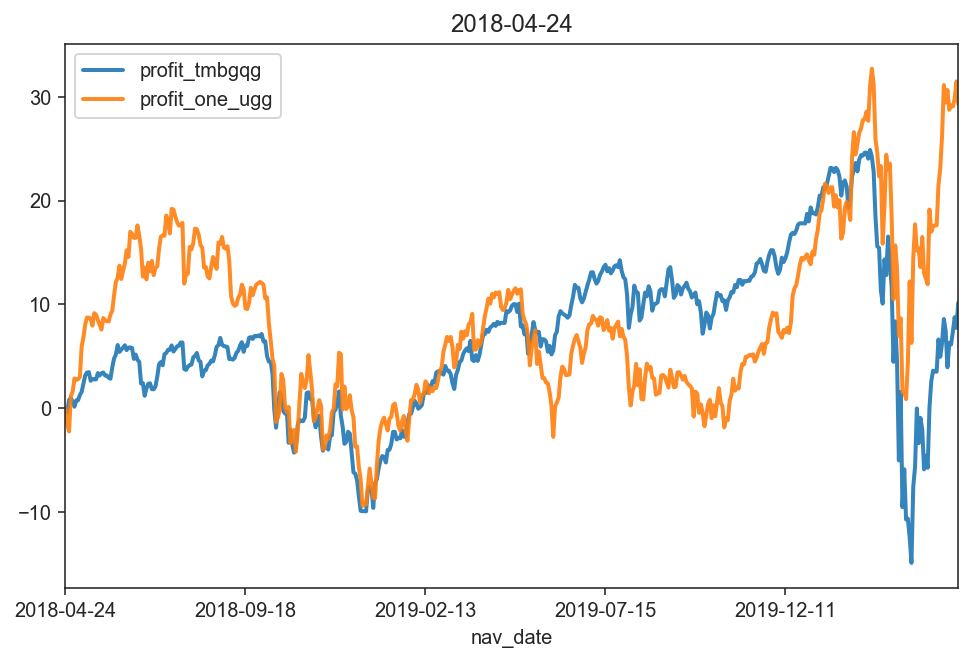

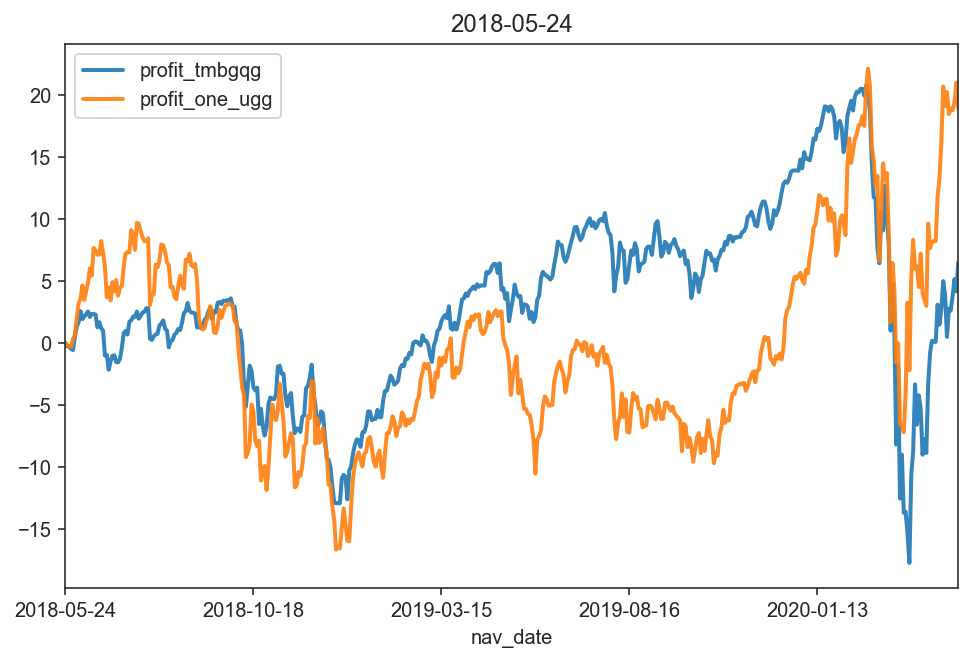

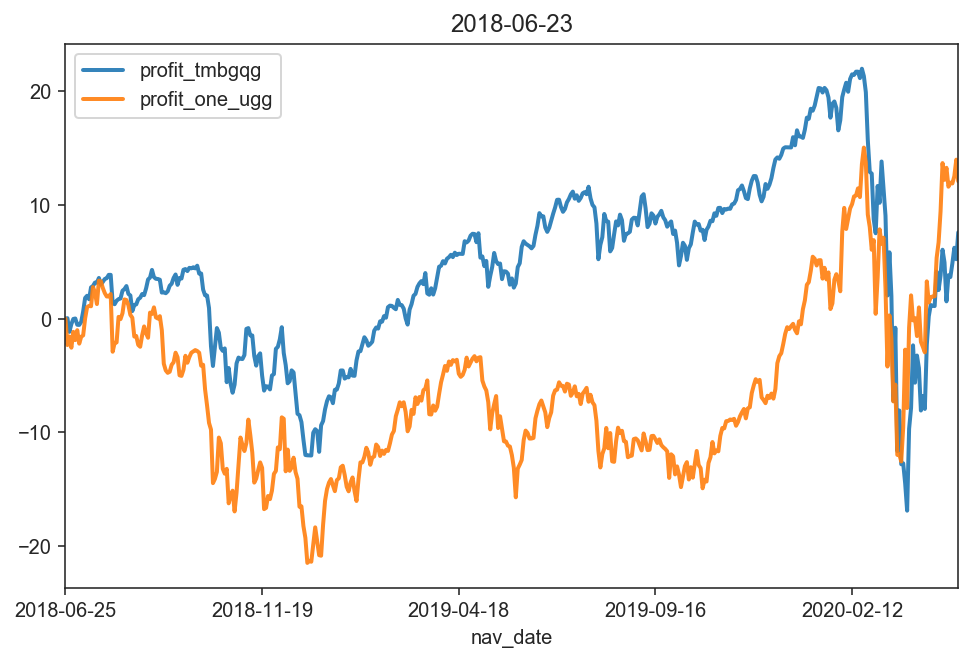

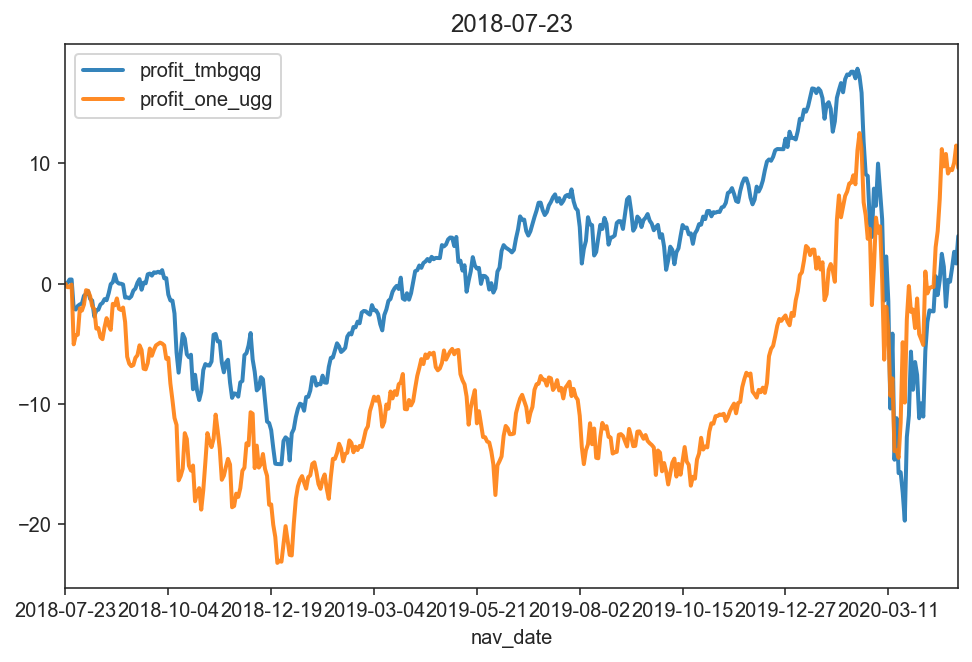

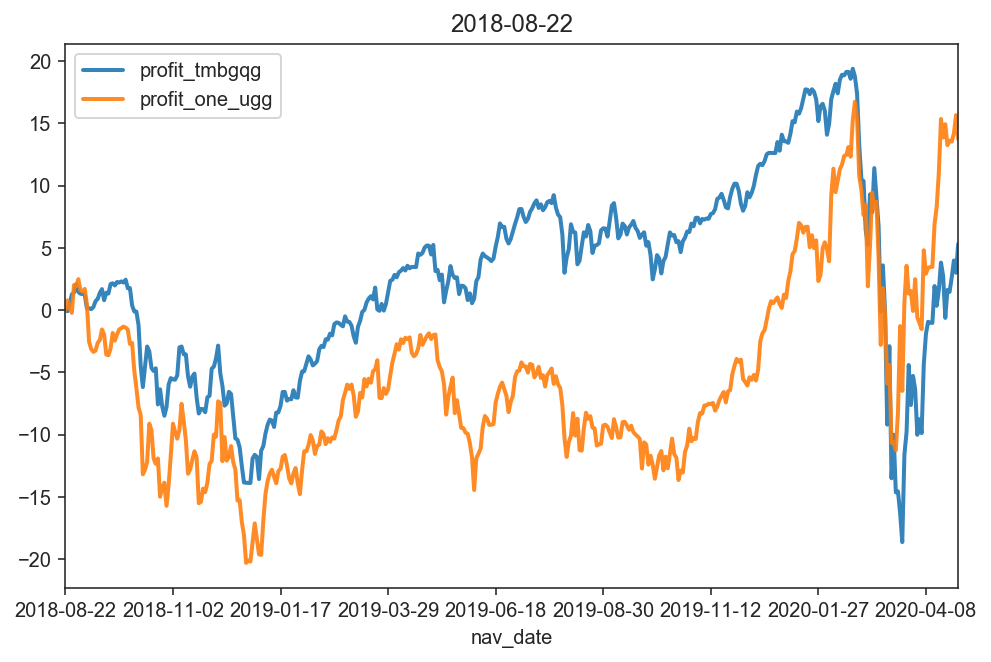

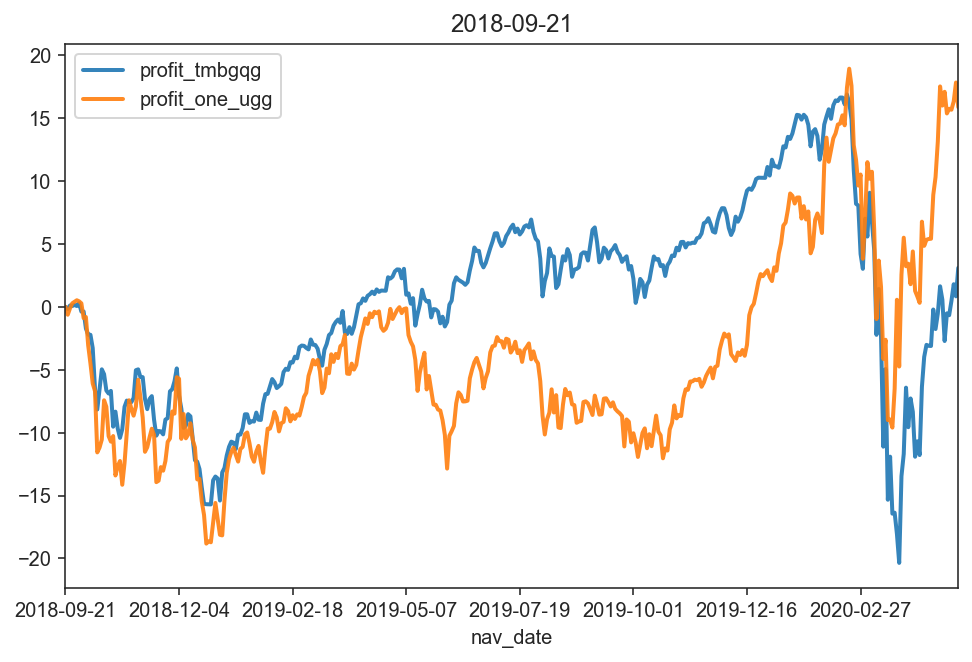

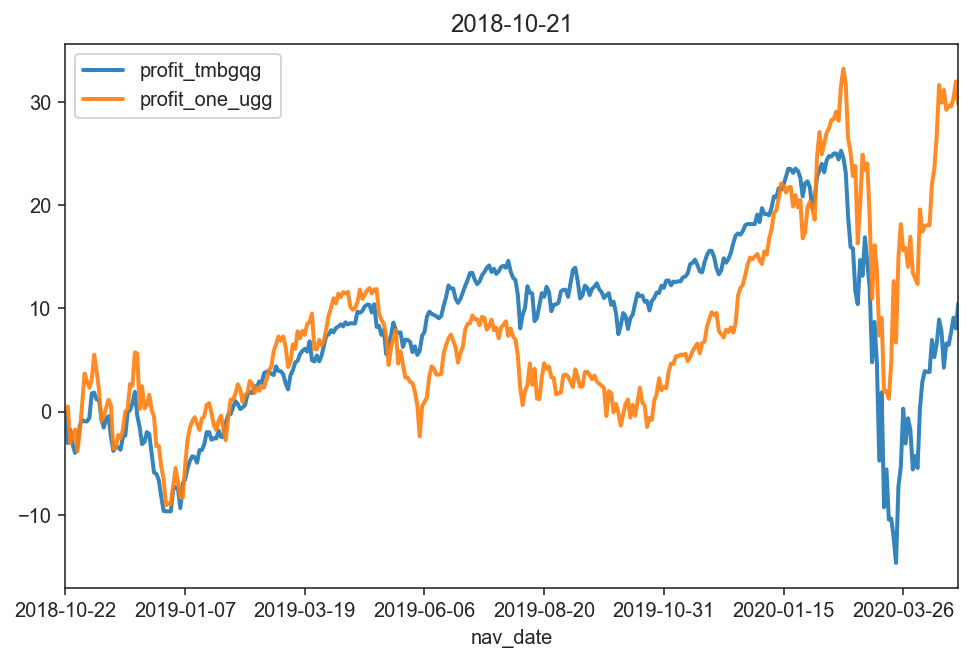

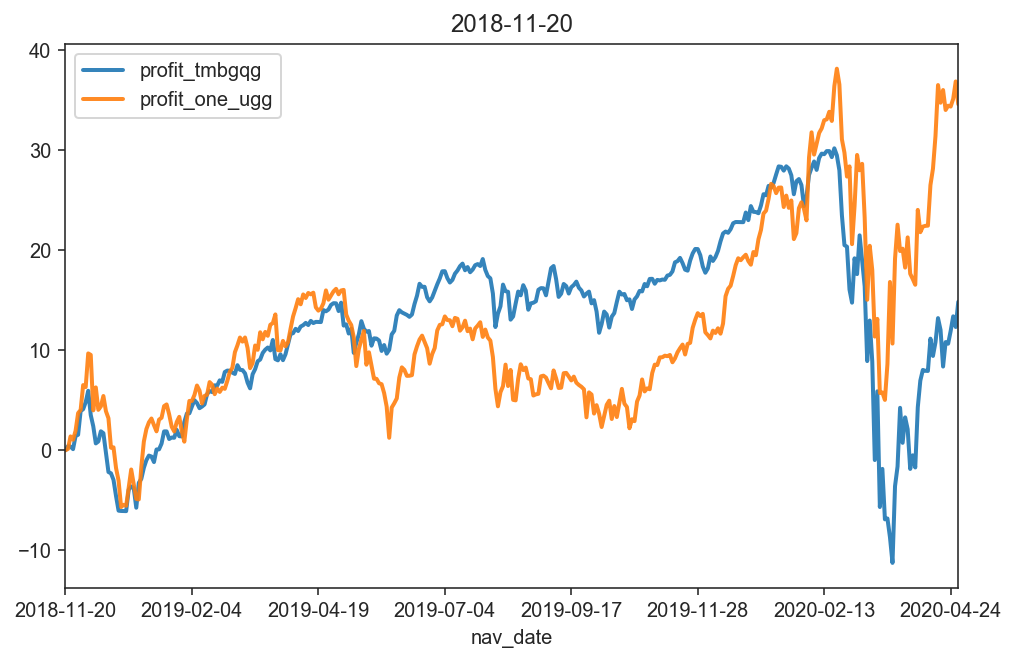

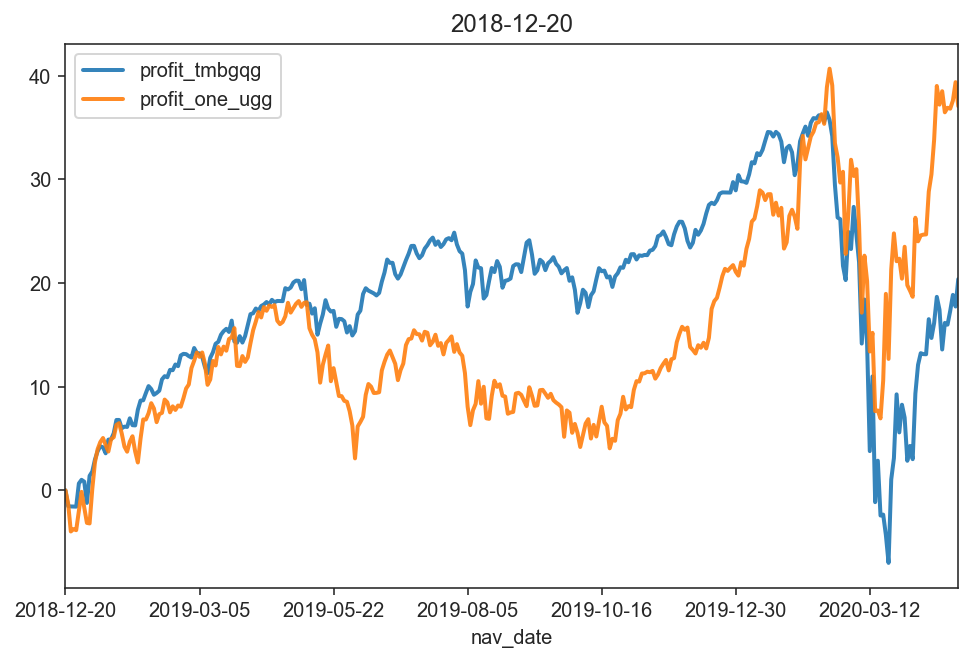

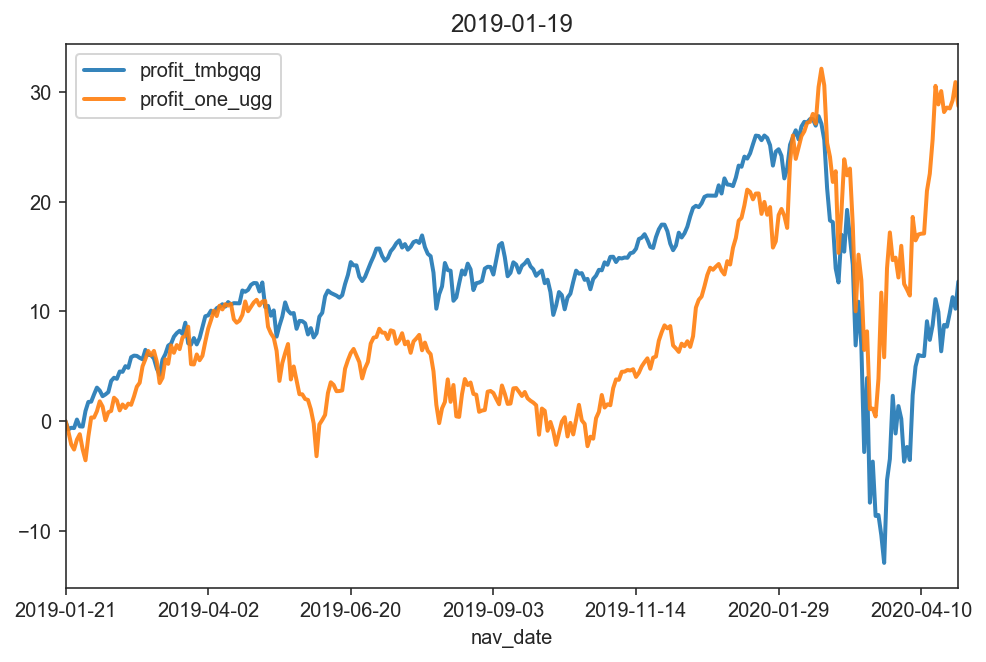

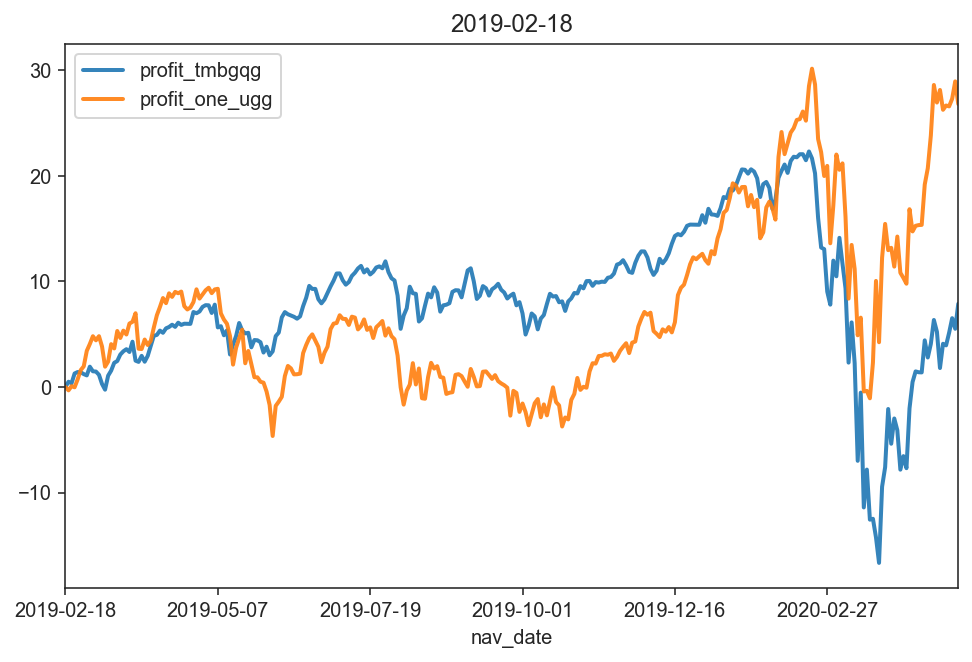

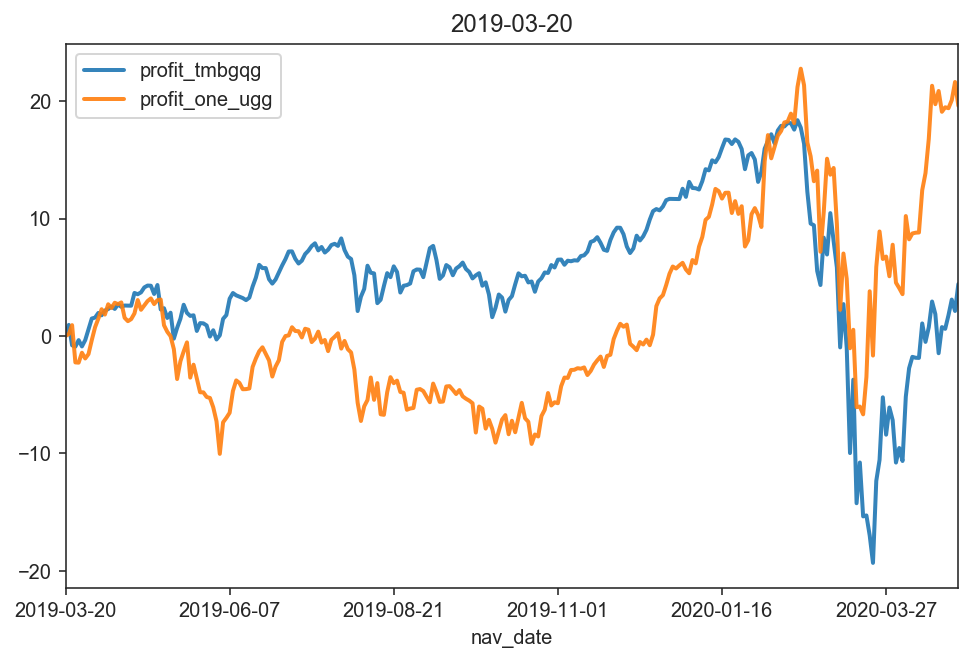

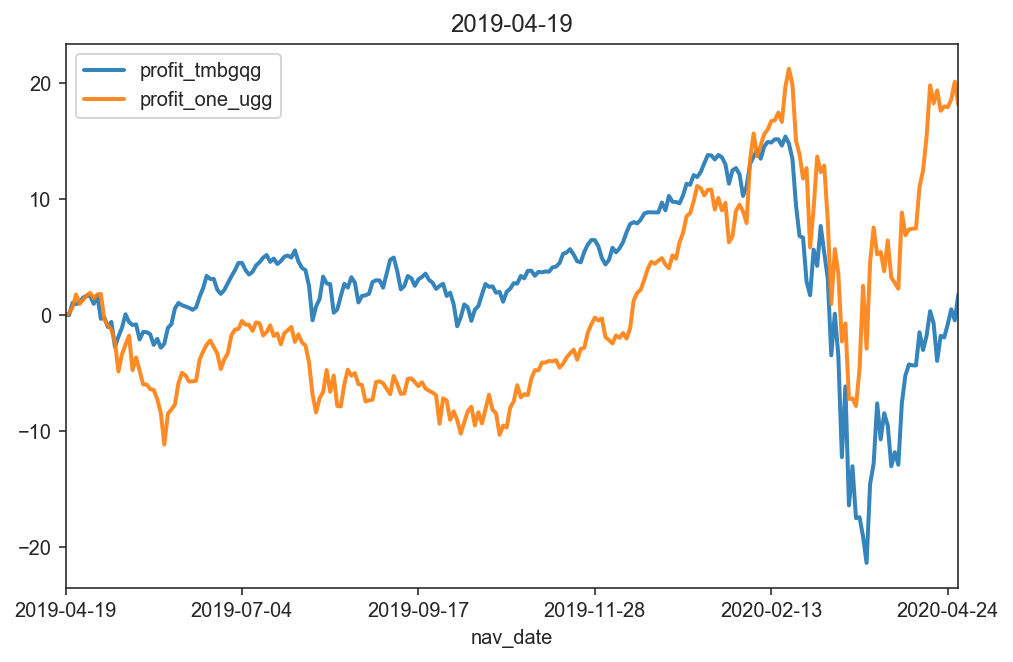

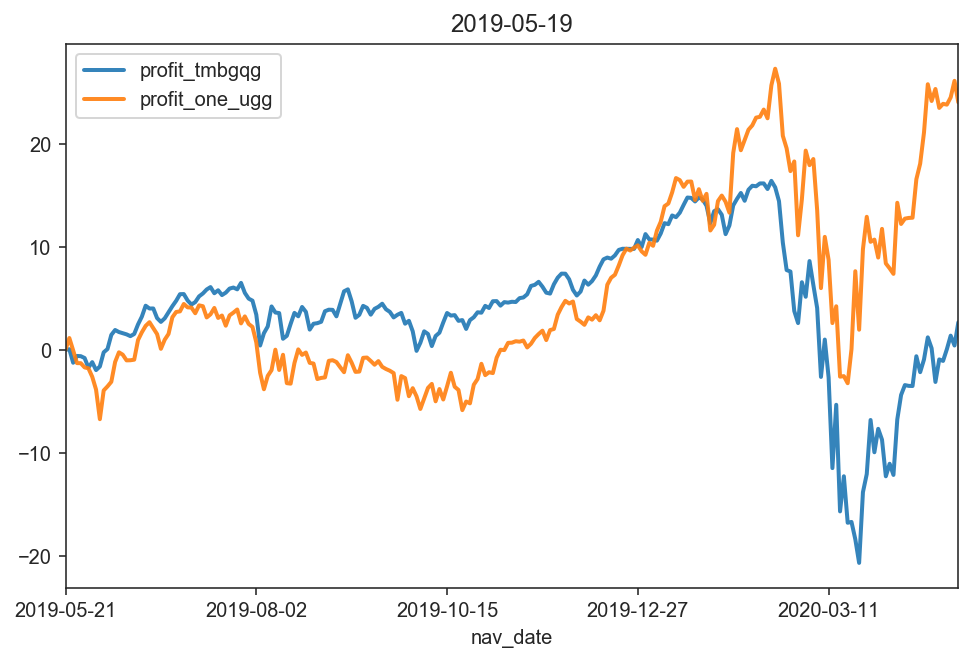

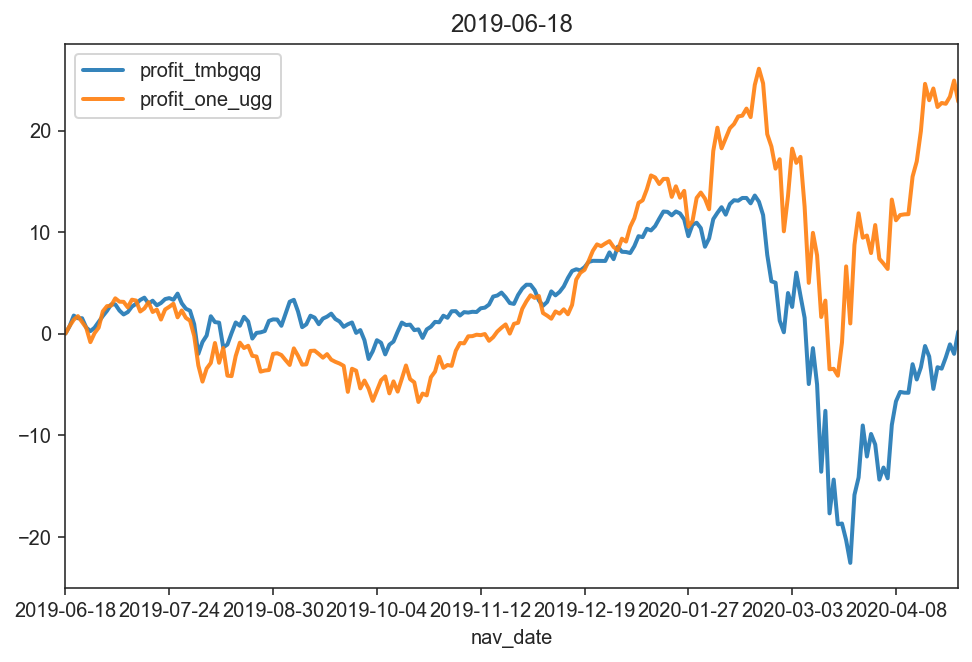

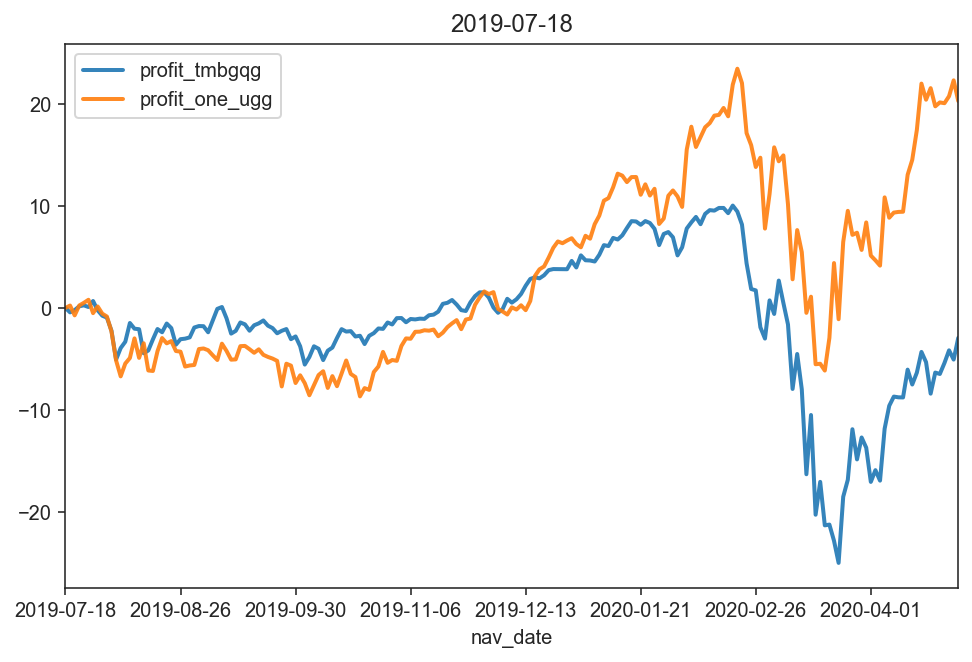

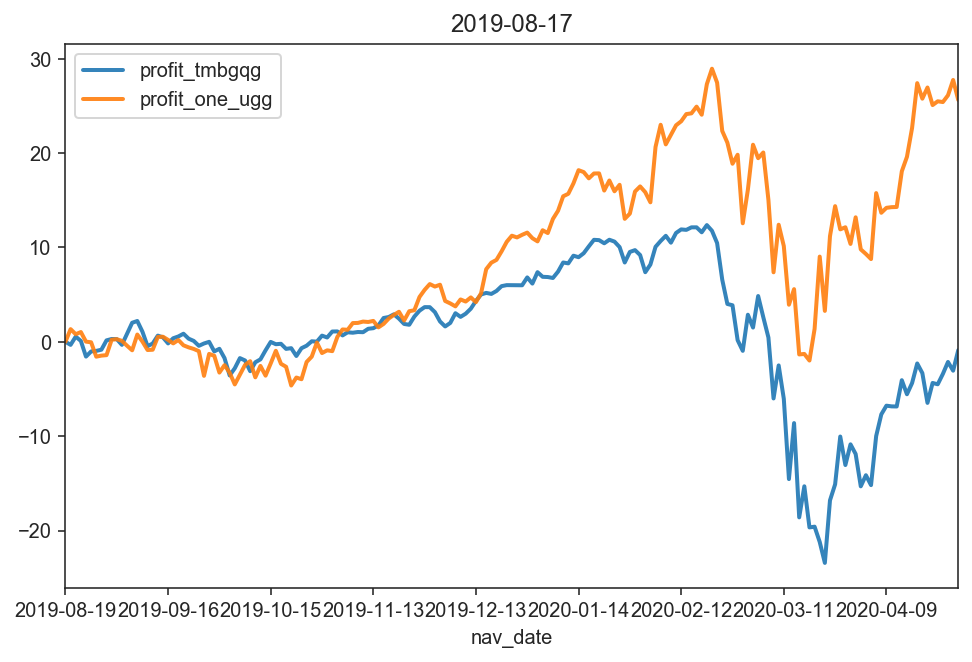

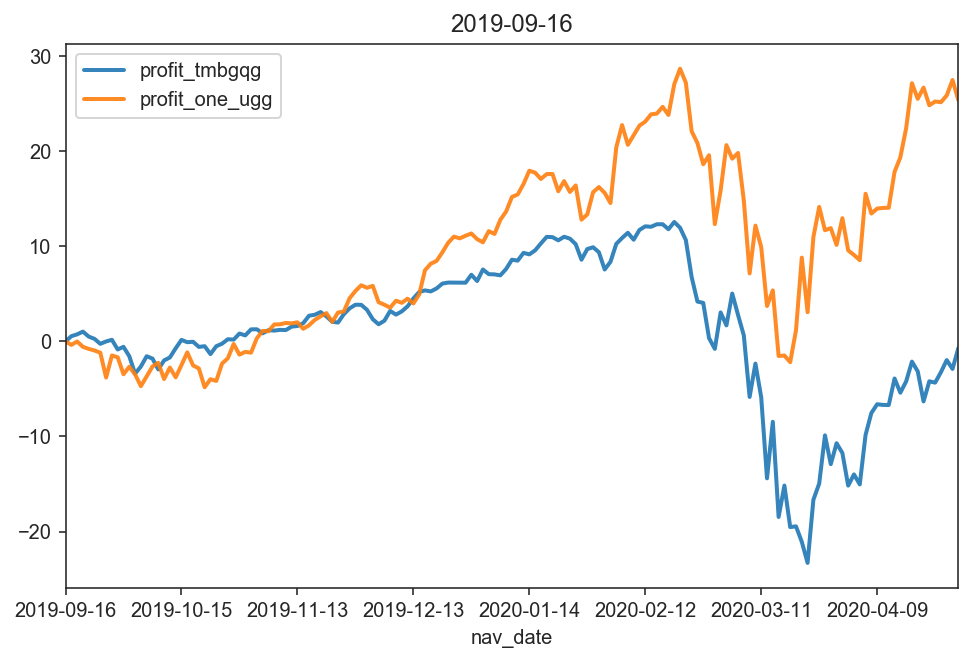

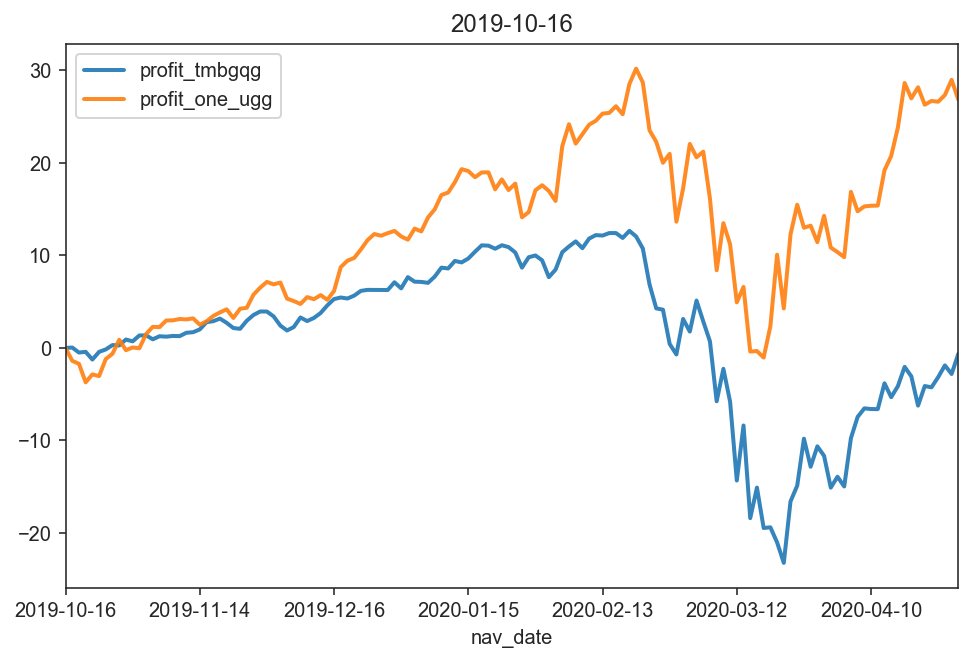

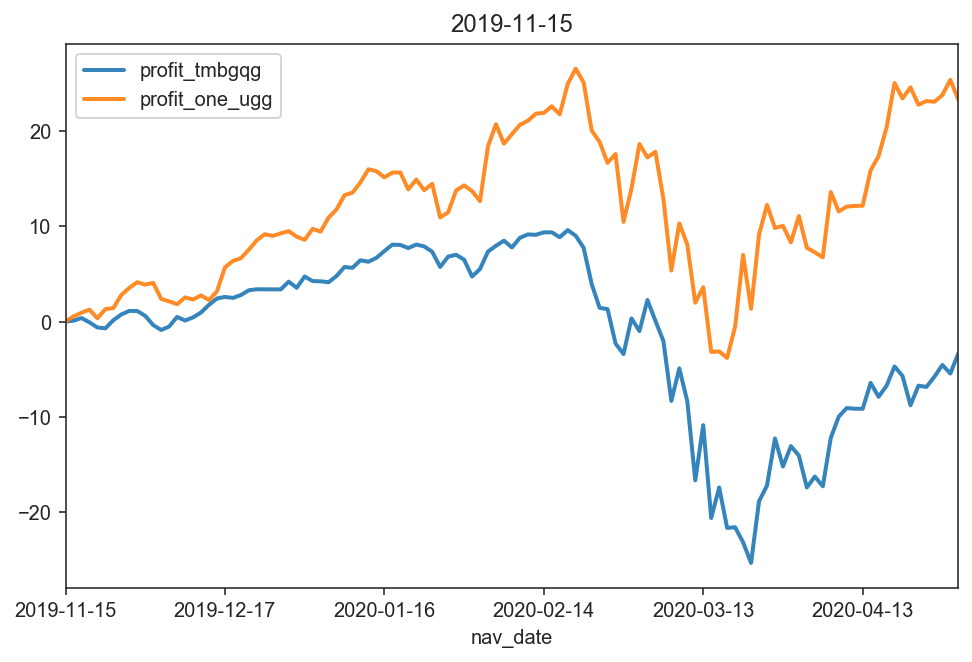

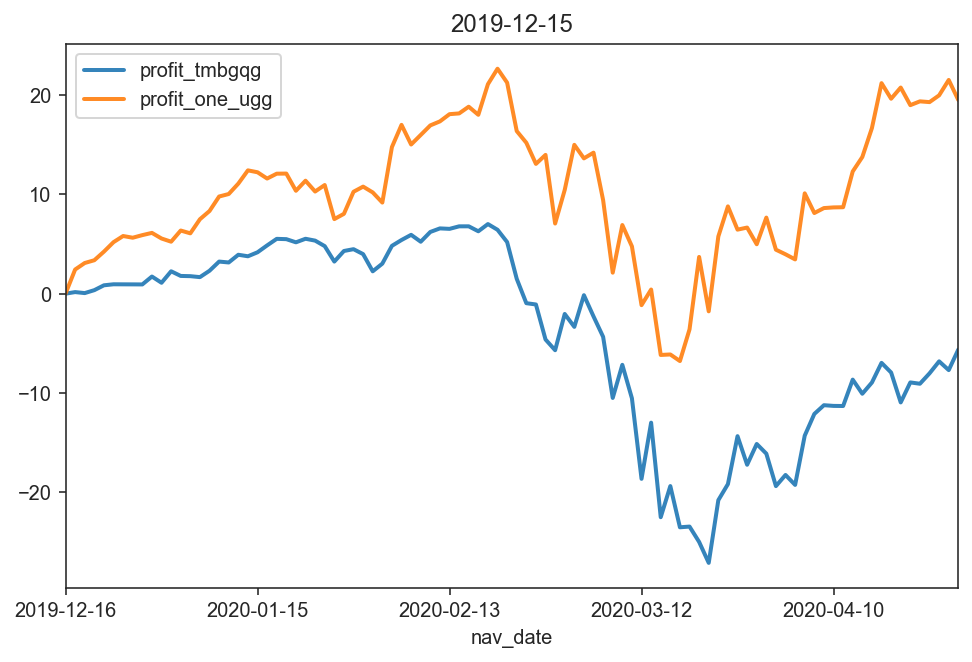

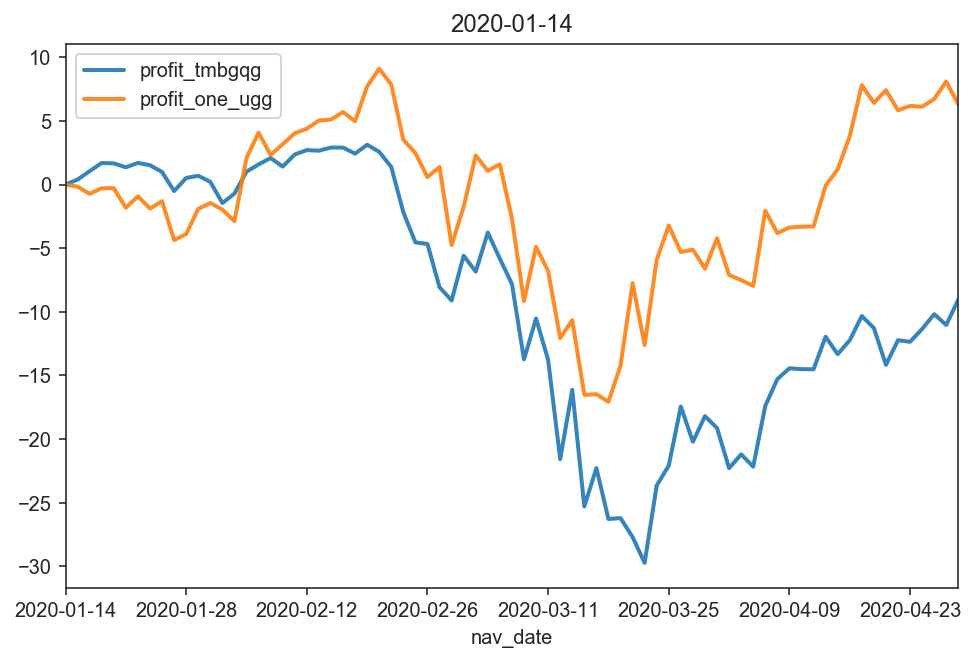

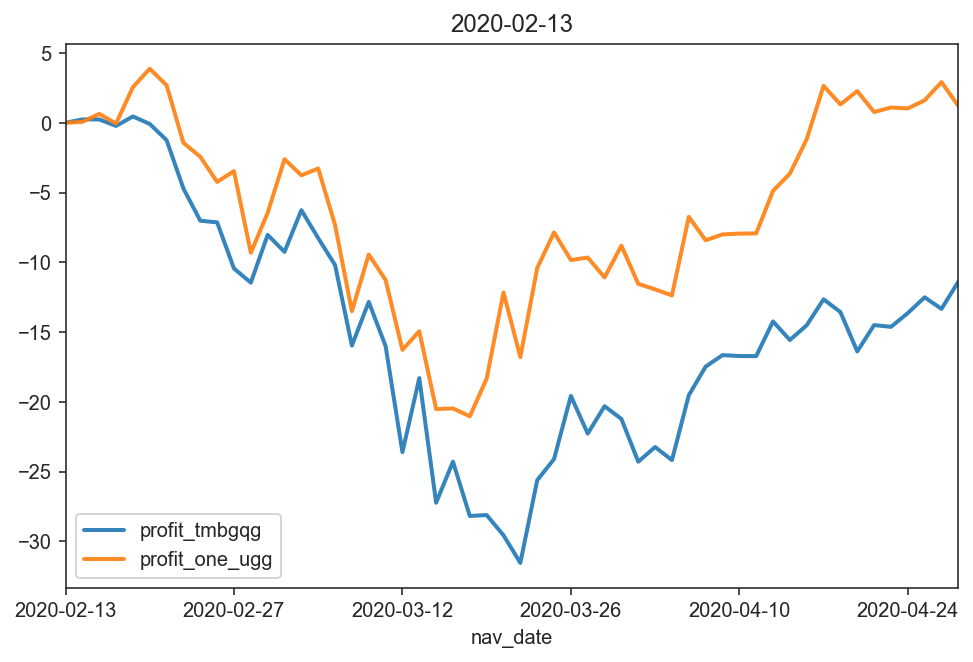

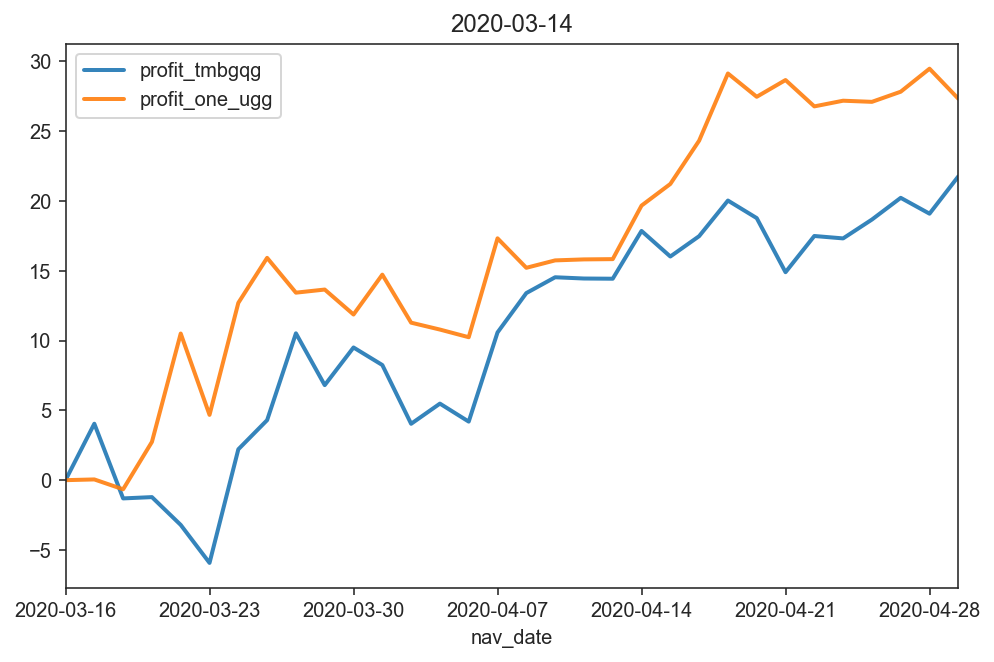

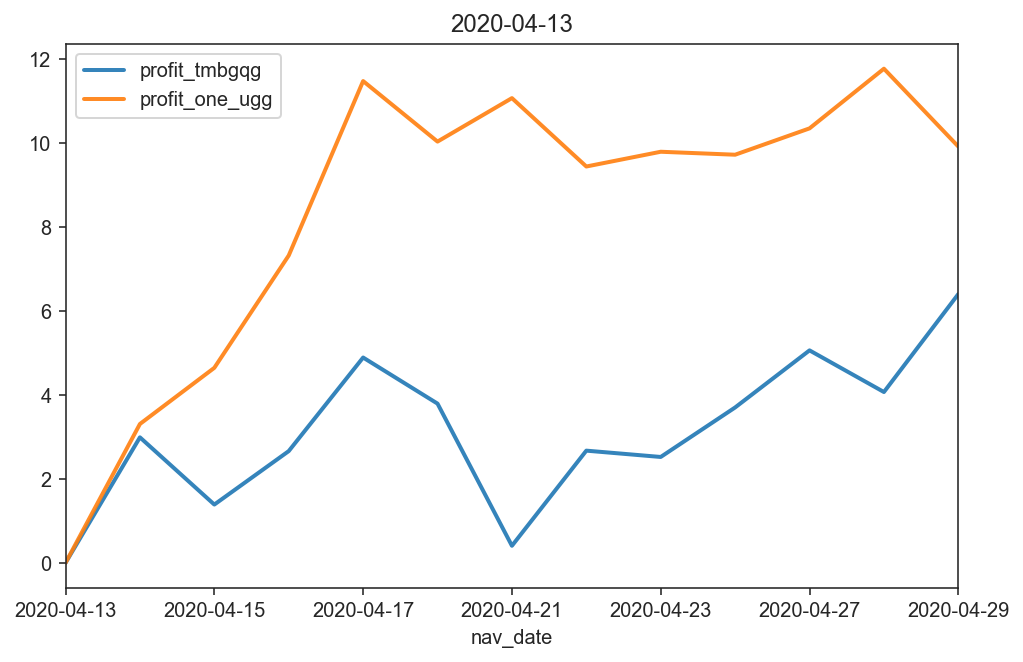

In [60]:
start = "2016-01-01"

start = datetime.strptime(max(one_ugg.nav_date.min(), tmbgqg.nav_date.min()), "%Y-%m-%d")

while True:

    target_one_ugg = one_ugg[one_ugg.nav_date >= datetime.strftime(start, "%Y-%m-%d")].reset_index(drop=True)
    
    if len(target_one_ugg) == 0:
        break
    target_one_ugg["profit"] = (target_one_ugg["value"] - target_one_ugg["value"].loc[0])/target_one_ugg["value"].loc[0]*100

    target_tmbgqg = tmbgqg[tmbgqg.nav_date >= datetime.strftime(start, "%Y-%m-%d")].reset_index(drop=True)
    target_tmbgqg["profit"] = (target_tmbgqg["value"] - target_tmbgqg["value"].loc[0])/target_tmbgqg["value"].loc[0]*100

    m_df = target_tmbgqg[["nav_date", "profit"]].merge(target_one_ugg[["nav_date", "profit"]], on="nav_date", suffixes=["_tmbgqg", "_one_ugg"], 
                                                       how="outer").sort_values("nav_date").fillna(method="backfill")
    #m_df.sort_values("nav_date")
    ax = m_df.plot(y=["profit_tmbgqg", "profit_one_ugg"], x="nav_date", alpha=0.9, linewidth=2)
    _ = ax.set_title(datetime.strftime(start, "%Y-%m-%d"))
    
    start = start + timedelta(days=30)
    # ax = target_tmbgqg.plot(y="profit", x="nav_date", ax=ax, label="tmbgqg")

# DCA simulation

In [15]:
target_one_ugg.head()

mstar_id    nav_date  value     amount        name morningstar_id
0  F00000WS3W  2016-10-21 12.785  134732582  ONE-UGG-RA     F00000WS3W
1  F00000WS3W  2016-10-25 12.904  136085178  ONE-UGG-RA     F00000WS3W
2  F00000WS3W  2016-10-26 12.804  135119277  ONE-UGG-RA     F00000WS3W
3  F00000WS3W  2016-10-27 12.688  133969576  ONE-UGG-RA     F00000WS3W
4  F00000WS3W  2016-10-28 12.621  133445041  ONE-UGG-RA     F00000WS3W

83 2019-10-01 2020-02-01 2020-02-24 00:00:00
125 2019-08-01 2020-02-01 2020-03-07 00:00:00
167 2019-05-30 2020-02-01 2020-03-17 00:00:00
209 2019-03-23 2020-02-01 2020-03-22 00:00:00
250 2019-01-24 2020-02-01 2020-04-06 00:00:00
292 2018-11-21 2020-02-01 2020-04-15 00:00:00
334 2018-09-20 2020-02-01 2020-04-26 00:00:00
376 2018-07-18 2020-02-01 2020-05-05 00:00:00
418 2018-05-17 2020-02-01 2020-05-16 00:00:00
459 2018-03-15 2020-02-01 2020-05-26 00:00:00
501 2018-01-13 2020-02-01 2020-06-07 00:00:00
543 2017-11-09 2020-02-01 2020-06-15 00:00:00
585 2017-09-01 2020-02-01 2020-06-19 00:00:00
627 2017-06-30 2020-02-01 2020-06-29 00:00:00
668 2017-04-28 2020-02-01 2020-07-09 00:00:00
710 2017-02-24 2020-02-01 2020-07-19 00:00:00
752 2016-12-23 2020-02-01 2020-07-29 00:00:00
794 2016-10-21 2020-02-01 2020-08-08 00:00:00


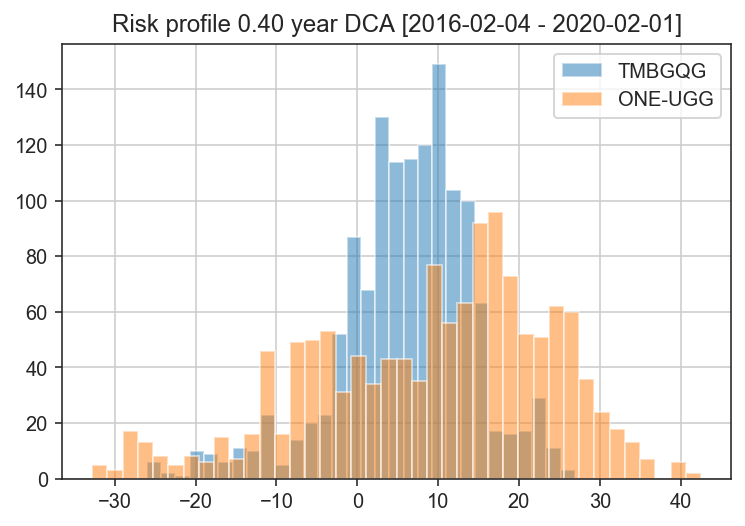

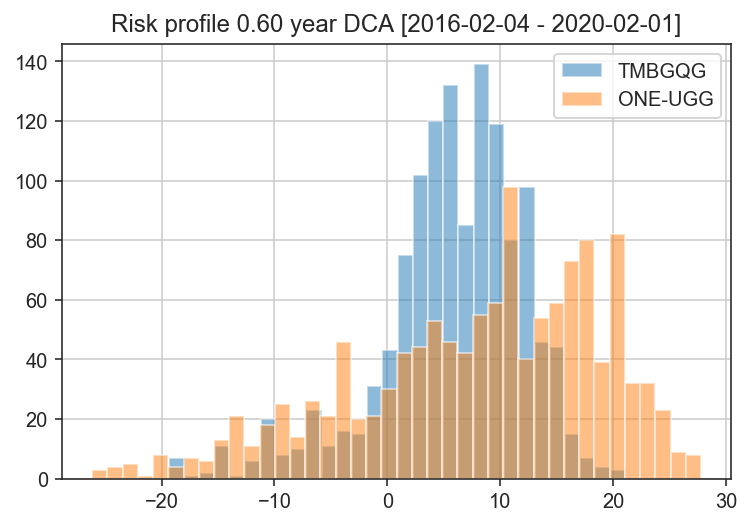

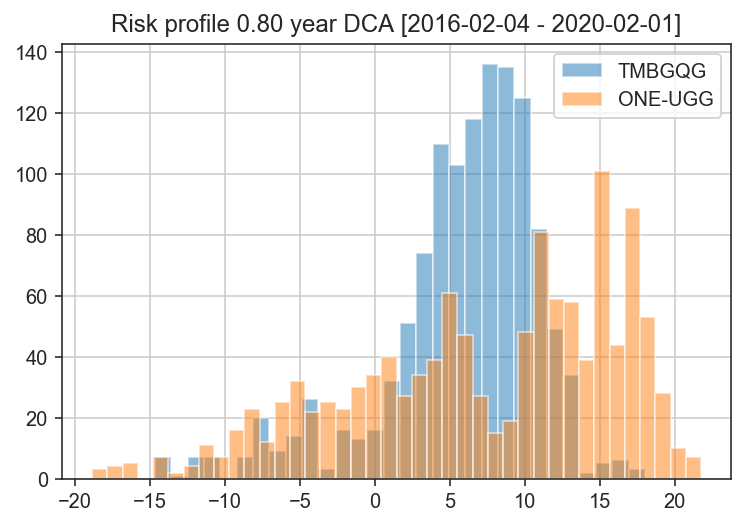

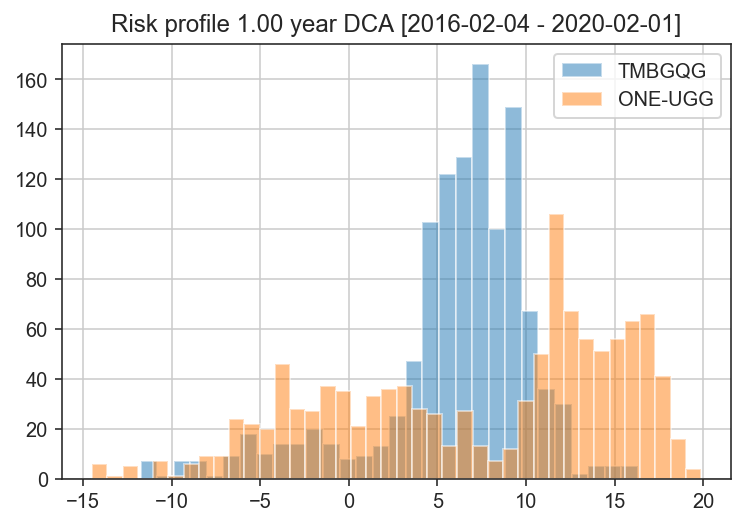

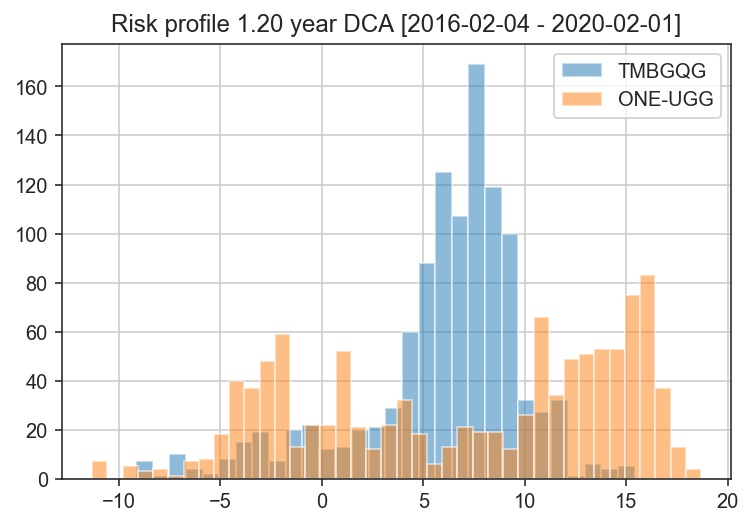

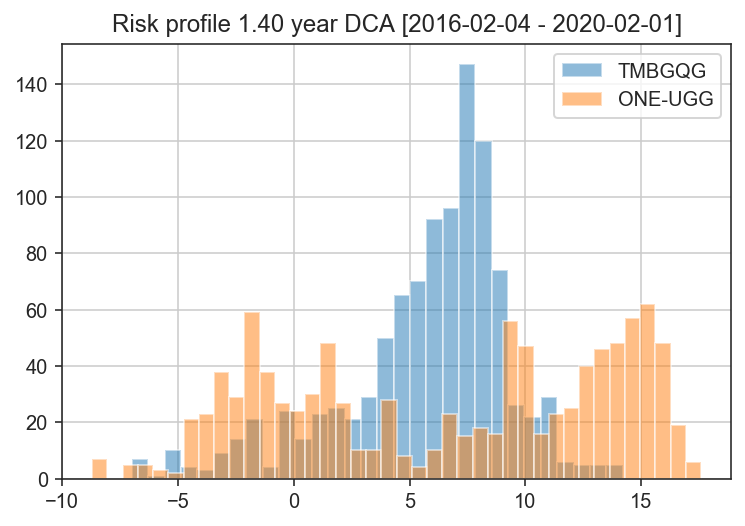

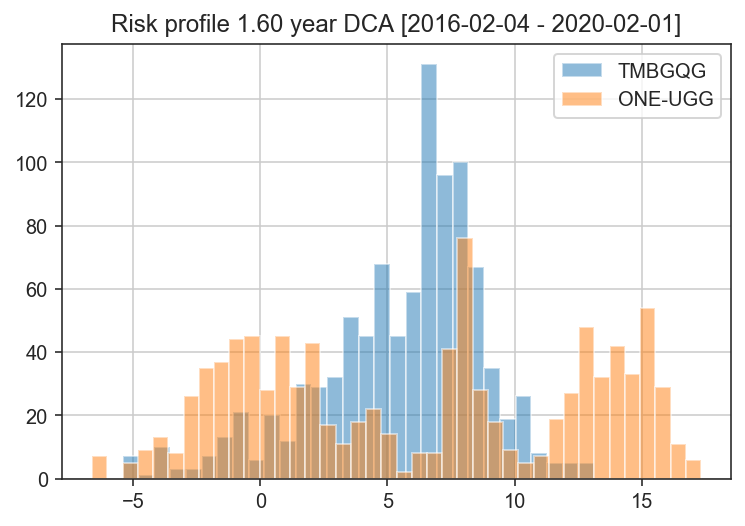

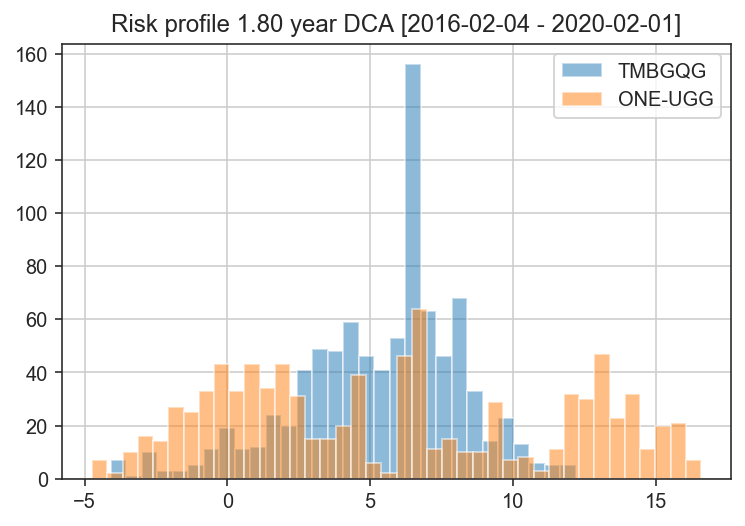

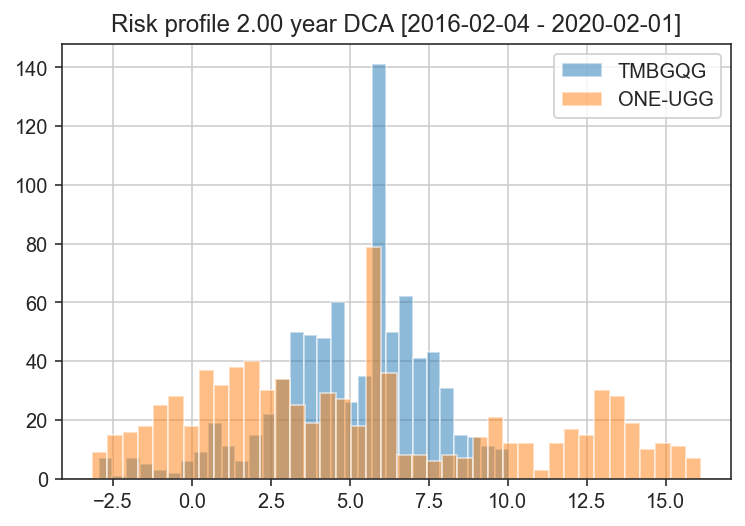

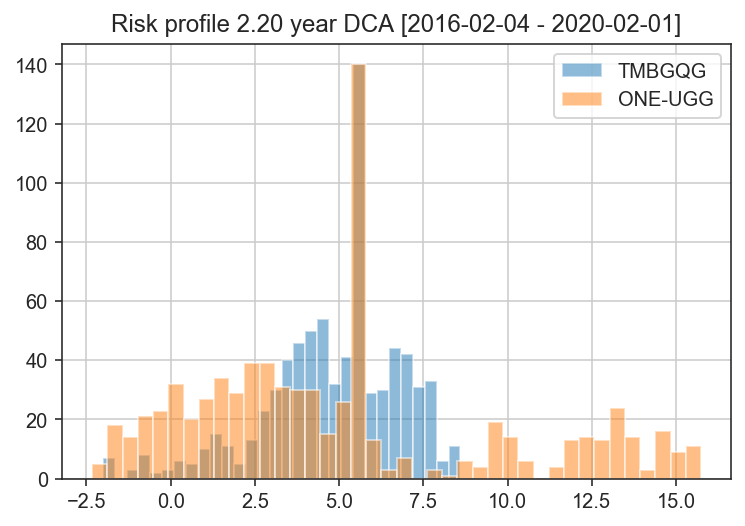

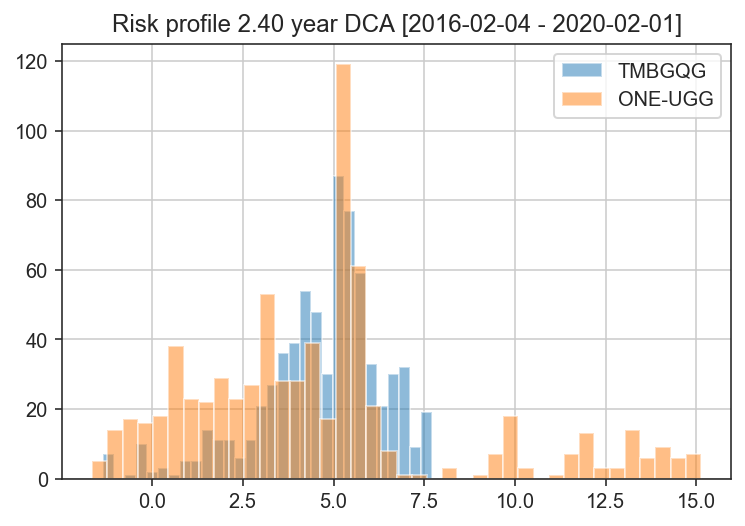

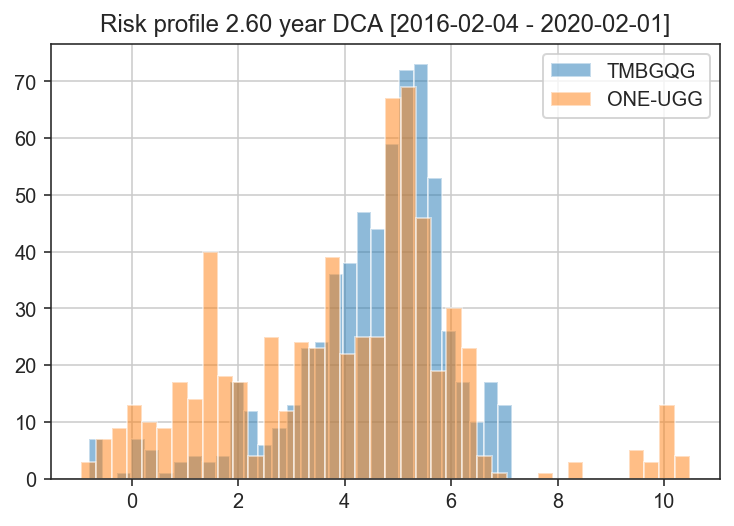

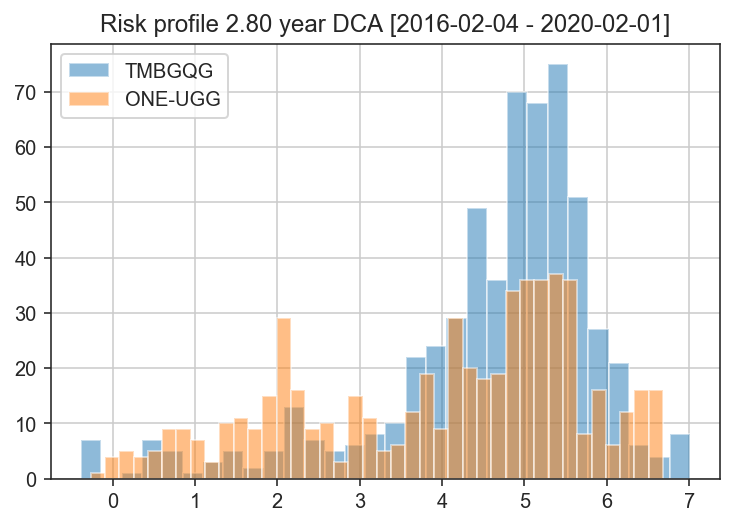

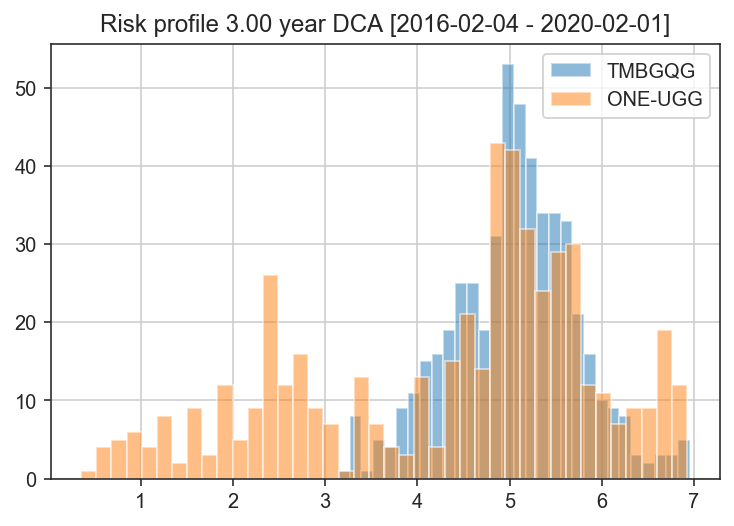

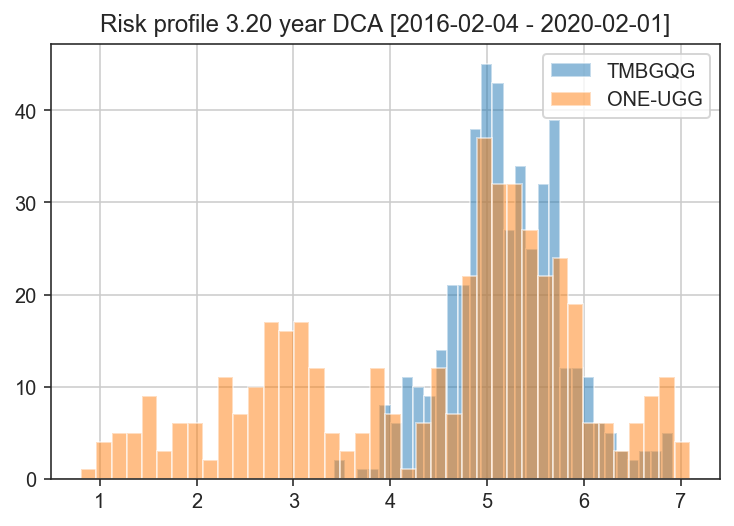

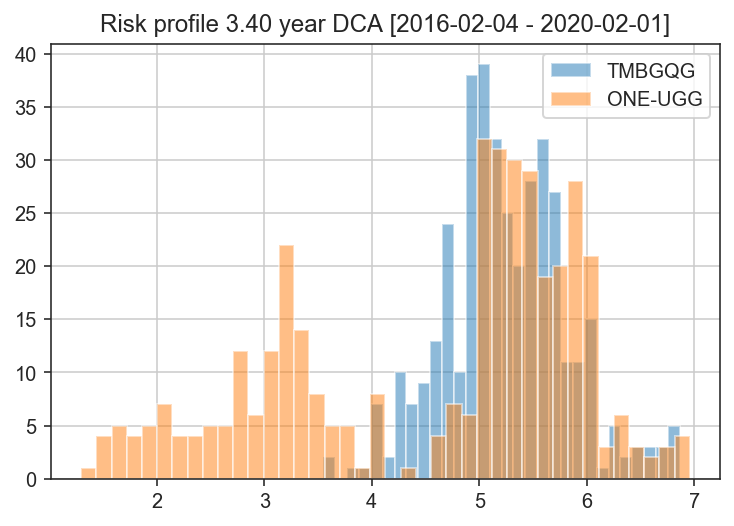

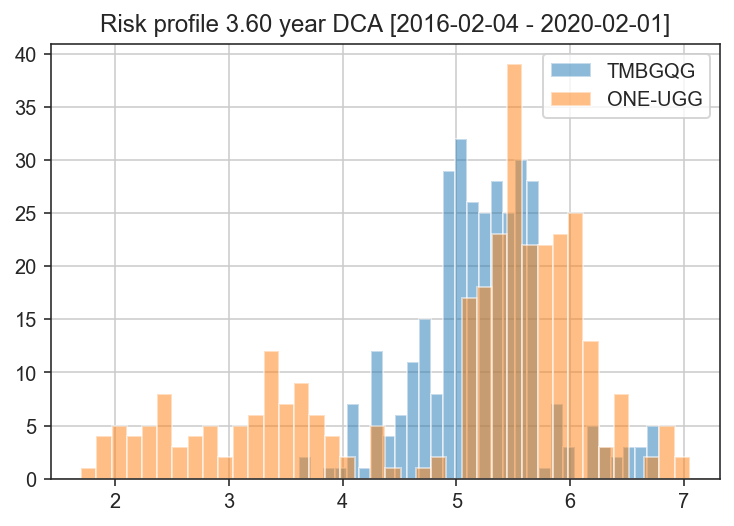

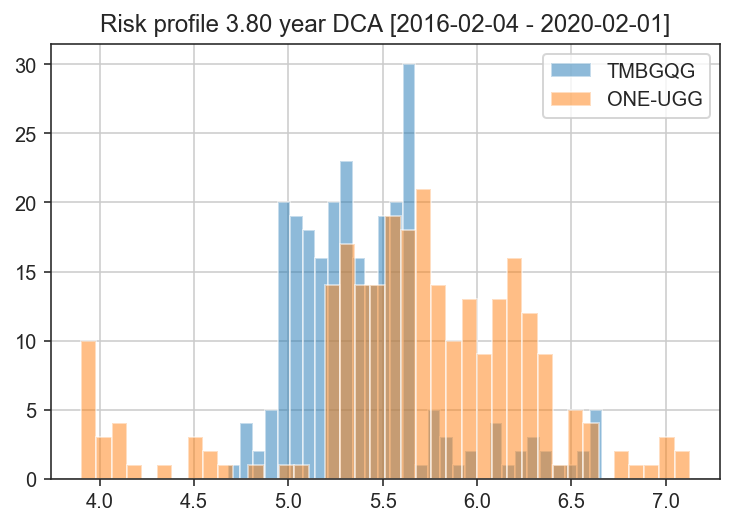

In [10]:
from datetime import datetime, timedelta

one_ugg_stat = {
    "dca": [],
    "count": [],
    "mean": [],
    "std": [],
    "25%": [],
    "50%": [],
    "75%": []
}

tmbgqg_stat = {
    "dca": [],
    "count": [],
    "mean": [],
    "std": [],
    "25%": [],
    "50%": [],
    "75%": []
}

for dca_year in np.arange(start=0.4, stop=4, step=0.2):
    
    #start = datetime.strptime("2017-01-01", "%Y-%m-%d")
    #start = datetime.strptime("2018-03-20", "%Y-%m-%d")
    start = datetime.strptime(max(one_ugg.nav_date.min(), tmbgqg.nav_date.min()), "%Y-%m-%d")
    start_str = datetime.strftime(start, "%Y-%m-%d")

    curr_start = start

    #crisis_day = "2020-01-01"
    crisis_day = "2020-02-01"
    #crisis_day = "2020-05-04"
    
    one_ugg_dca_profit = []
    tmbgqg_dca_profit = []
    
    while True:

        end = curr_start + timedelta(days=365*dca_year)
        end_str = min(crisis_day, datetime.strftime(end, "%Y-%m-%d"))
        curr_start_str = datetime.strftime(curr_start, "%Y-%m-%d")

        target_one_ugg = one_ugg[(one_ugg.nav_date >= curr_start_str) & (one_ugg.nav_date <= end_str)].reset_index(drop=True)
        target_tmbgqg = tmbgqg[(tmbgqg.nav_date >= curr_start_str) & (tmbgqg.nav_date <= end_str)].reset_index(drop=True)

        if len(target_one_ugg) <= 365*dca_year-(2*4*12*dca_year)-60*dca_year:
            print(len(target_one_ugg), curr_start_str, end_str, end)
            break
        
        
        base_val = target_one_ugg["value"].mean()
        #base_val = target_one_ugg["value"].iloc[0]
        oneugg_profit = (target_one_ugg["value"].iloc[-1] - base_val)/base_val*100
        annualized_oneugg_profit = ((1+oneugg_profit/100)**(1/dca_year) - 1)*100
        
        base_val = target_tmbgqg["value"].mean()
        #base_val = target_tmbgqg["value"].iloc[0]
        tmbgqg_profit = (target_tmbgqg["value"].iloc[-1] - base_val)/base_val*100
        annualized_tmbgqg_profit = ((1+tmbgqg_profit/100)**(1/dca_year) - 1)*100

        one_ugg_dca_profit.append(annualized_oneugg_profit)
        tmbgqg_dca_profit.append(annualized_tmbgqg_profit)

        curr_start = curr_start + timedelta(days=1)
        # ax = target_tmbgqg.plot(y="profit", x="nav_date", ax=ax, label="tmbgqg")
    
    tmbgqg_dca_profit = pd.Series(tmbgqg_dca_profit)
    one_ugg_dca_profit = pd.Series(one_ugg_dca_profit)
    
    one_ugg_stat["dca"].append(dca_year)
    one_ugg_stat["count"].append(len(one_ugg_dca_profit))
    one_ugg_stat["mean"].append(one_ugg_dca_profit.mean())
    one_ugg_stat["std"].append(one_ugg_dca_profit.std())
    one_ugg_stat["25%"].append(one_ugg_dca_profit.quantile(0.25))
    one_ugg_stat["50%"].append(one_ugg_dca_profit.quantile(0.5))
    one_ugg_stat["75%"].append(one_ugg_dca_profit.quantile(0.75))
    
    tmbgqg_stat["dca"].append(dca_year)
    tmbgqg_stat["count"].append(len(tmbgqg_dca_profit))
    tmbgqg_stat["mean"].append(tmbgqg_dca_profit.mean())
    tmbgqg_stat["std"].append(tmbgqg_dca_profit.std())
    tmbgqg_stat["25%"].append(tmbgqg_dca_profit.quantile(0.25))
    tmbgqg_stat["50%"].append(tmbgqg_dca_profit.quantile(0.5))
    tmbgqg_stat["75%"].append(tmbgqg_dca_profit.quantile(0.75))
    
    
    _ = plt.figure();
    ax = pd.Series(tmbgqg_dca_profit).hist(bins=30, alpha=0.5, label="TMBGQG")
    _ = ax.set_title(f"Risk profile {dca_year:.2f} year DCA [{start_str} - {crisis_day}]")
    _ = pd.Series(one_ugg_dca_profit).hist(bins=40, ax=ax, alpha=0.5, label="ONE-UGG")
    _ = ax.legend()

#     print("TMB")
#     pd.Series(tmbgqg_dca_profit).describe()
#     print("###############\n")

#     print("ONE")
#     pd.Series(one_ugg_dca_profit).describe()


In [11]:
tmbgqg_stat_df = pd.DataFrame(tmbgqg_stat)
one_ugg_stat_df = pd.DataFrame(one_ugg_stat)

stat_summary_df = tmbgqg_stat_df.merge(one_ugg_stat_df, on="dca", suffixes=["_tmb", "_one"], how="outer")
stat_summary_df

dca  count_tmb  mean_tmb  std_tmb  25%_tmb  50%_tmb  75%_tmb  count_one  mean_one  std_one  25%_one  50%_one  75%_one
0  0.400       1335     6.073    8.500    1.936    6.905   11.424       1335     9.205   14.702   -1.868   11.767   19.771
1  0.600       1274     5.767    6.527    2.698    6.324   10.107       1274     7.983   11.041    1.318   10.135   16.836
2  0.800       1211     5.833    5.297    3.859    6.944    9.321       1211     7.313    8.855    0.742    9.838   15.041
3  1.000       1143     5.981    4.550    4.866    6.911    8.895       1143     7.297    8.089    0.351   10.632   14.067
4  1.200       1085     5.948    4.082    4.783    6.854    8.366       1085     7.125    7.665   -0.185    9.894   14.114
5  1.400       1021     5.765    3.646    4.260    6.613    7.964       1021     6.663    7.079   -0.216    8.116   13.370
6  1.600        959     5.570    3.262    3.831    6.450    7.811        959     6.218    6.471    0.244    7.477   12.791
7  1.800        895     5.358    2.911    3.680    6.203    7.169        895     5.725    5.750    0.757    4.810   11.771
8  2.000        833     5.068    2.426    3.589    5.705    6.697        833     5.321    5.057    1.301    4.622    9.410
9  2.200        770     4.841    2.013    3.719    5.377    6.157        770     5.058    4.548    1.716    4.379    5.957
10 2.400        709     4.662    1.709    3.835    5.080    5.673        709     4.604    3.702    2.042    4.379    5.549
11 2.600        644     4.520    1.484    3.854    4.888    5.468        644     4.004    2.226    2.472    4.333    5.287
12 2.800        575     4.598    1.350    4.173    4.957    5.417        575     3.988    1.714    2.451    4.486    5.306
13 3.000        512     5.055    0.692    4.611    5.083    5.511        512     4.365    1.602    2.934    4.878    5.502
14 3.200        449     5.197    0.603    4.861    5.158    5.586        449     4.444    1.501    3.054    4.947    5.512
15 3.400        386     5.245    0.578    4.915    5.207    5.609        386     4.596    1.375    3.302    5.136    5.639
16 3.600        323     5.229    0.548    4.943    5.234    5.552        323     4.922    1.318    3.748    5.458    5.850
17 3.800        260     5.407    0.387    5.117    5.350    5.600        260     5.665    0.648    5.388    5.703    6.093

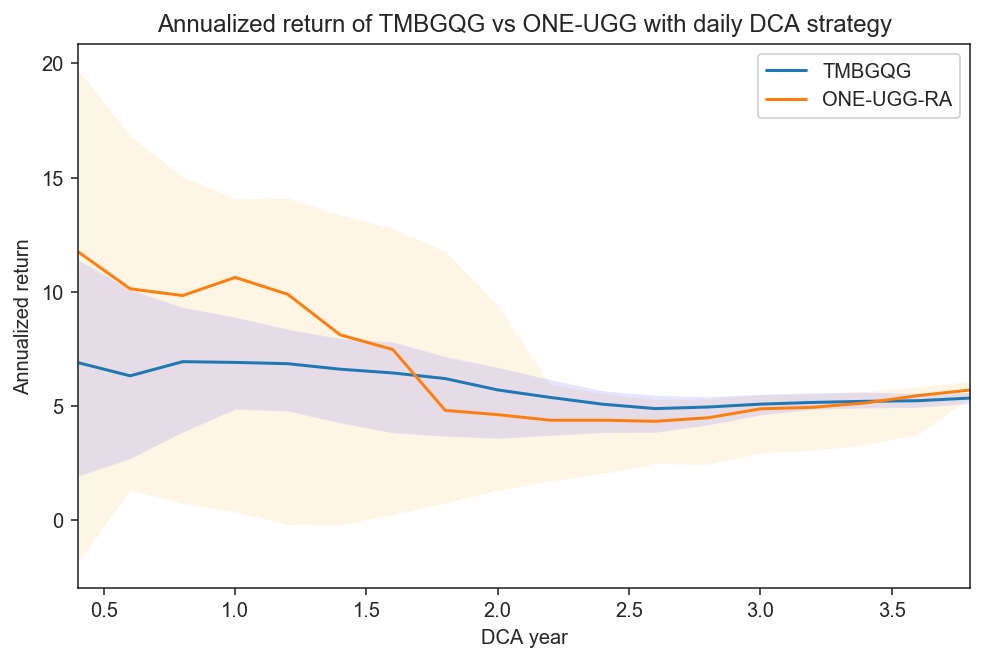

In [14]:
ax = stat_summary_df.plot(x="dca", y=["50%"+s for s in ["_tmb", "_one"]], label=["TMBGQG", "ONE-UGG-RA"])
_ = ax.set_xlabel("DCA year")
_ = ax.set_ylabel("Annualized return")
_ = ax.set_title("Annualized return of TMBGQG vs ONE-UGG with daily DCA strategy")


_ = ax.fill_between(stat_summary_df["dca"], stat_summary_df["25%_one"], stat_summary_df["75%_one"], 
                    facecolor='orange', alpha=0.1, label="avg ± std")

_ = ax.fill_between(stat_summary_df["dca"], stat_summary_df["25%_tmb"], stat_summary_df["75%_tmb"], 
                    facecolor='blue', alpha=0.1, label="avg ± std")